<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/financial_math_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

###***Chapter 1 Brownian Motion***

###### ***Simple Random Walk***

$$
\displaystyle
S_n 
=\sum_{k=1}^nX_k
$$

where $X_k$ are iid with

$$
\displaystyle
X_k
=\left\{\begin{array}{rll}
1&&\text{with probability }1/2\\
-1&&\text{with probability }1/2
\end{array}\right.
$$

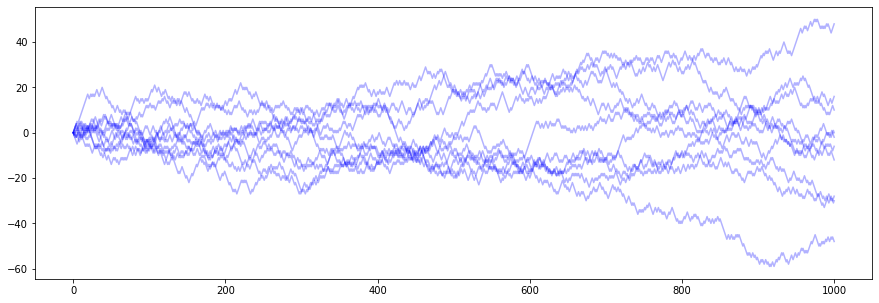

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_sample_path(num_paths, num_steps, seed=None):
    if seed is not None:
        np.random.seed(seed)
     
    Z = np.random.normal( 0., 1., ( num_paths, num_steps ) )
    SRW = np.zeros( ( num_paths, num_steps + 1 ) )
    
    for i in range(num_steps):
        if num_paths > 1:
            Z[:,i] = ( Z[:,i] - Z[:,i].mean() ) / Z[:,i].std()
        dW = 2 * ( Z[:,i] > 0 ) - 1
        SRW[:,i+1] = SRW[:,i] + dW
    return SRW

def main():
    num_paths = 10
    num_steps = 1_000
        
    SRW = generate_sample_path(num_paths, num_steps, seed=0)
    
    fig, ax = plt.subplots(figsize=(15,5))
    for i in range(num_paths):
        ax.plot(SRW[i], color='blue', alpha=0.3)
    plt.show()
    
    
if __name__ == "__main__":
    main() 

###### ***Simulation of Brownian Motion using Paper and Pencil***

***Using a Standard Normal Coin***

$$\begin{array}{lll}
\text{Number of ticks per year}&&n\\
\\
\text{Standard normal coin flip at tick $k$}&&X_k\\
\\
\text{Number of ticks between $0$ and $t$}&&nt\\
\\
\text{Cumulative standard normal coin flips up to time $t$}&&\sum_{k=1}^{nt}X_k\\
\\
\text{Normalized cumulative standard normal coin flips up to time $t$}&&
\displaystyle B_t= \frac{\sum_{k=1}^{nt}X_k}{\sqrt{n}}\\
\end{array}$$

***Using a Fair Coin***

$$\begin{array}{lll}
\text{Number of ticks per year}&&n\\
\\
\text{Fair coin flip at tick $k$ with $H$ as 1 and $T$ as $-1$}&&X_k\\
\\
\text{Number of ticks between $0$ and $t$}&&nt\\
\\
\text{Cumulative fair coin flips up to time $t$}&&\sum_{k=1}^{nt}X_k\\
\\
\text{Normalized cumulative fair coin flips up to time $t$}&&\displaystyle B_t= \frac{\sum_{k=1}^{nt}X_k}{\sqrt{n}}\\
\end{array}$$

***Using an Arbitrary Coin***

$$\begin{array}{lll}
\text{Number of ticks per year}&&n\\
\\
\text{IID coin flip at tick $k$}&&\frac{X_k-\mu}{\sigma}\\
\\
\text{Number of ticks between $0$ and $t$}&&nt\\
\\
\text{Cumulative IID coin flips up to time $t$}&&\displaystyle \sum_{k=1}^{nt}\frac{X_k-\mu}{\sigma}\\
\\
\text{Normalized cumulative IID coin flips up to time $t$}&&\displaystyle B_t= \frac{\sum_{k=1}^{nt}\frac{X_k-\mu}{\sigma}}{\sqrt{n}}\\
\end{array}$$

where

$$
\mathbb{E}X_k=\mu,
\quad
Var(X_k)=\sigma^2
$$

***Example - Brownian Motion Sample Path***

We flips a fair coin 10 times and we get
$$
HHTHTTHHHT
$$
Using this construct a Brownian motion sample path up to 1 year.

***Solution***

$$\begin{array}{lccccccccccccccccccc}
\text{Time}&0/10&1/10&2/10&3/10&4/10&5/10&6/10&7/10&8/10&9/10&10/10\\
\text{Coin flip}&-&H&H&T&H&T&T&H&H&H&T\\
\text{Conversion}&-&1&1&-1&1&-1&-1&1&1&1&-1\\
\text{Cum sum}&0&1&2&1&2&1&0&1&2&3&2\\
B_t&0&\displaystyle\frac{1}{\sqrt{10}}&\displaystyle\frac{2}{\sqrt{10}}&\displaystyle\frac{1}{\sqrt{10}}&\displaystyle\frac{2}{\sqrt{10}}&\displaystyle\frac{1}{\sqrt{10}}&\displaystyle\frac{0}{\sqrt{10}}&\displaystyle\frac{1}{\sqrt{10}}&\displaystyle\frac{2}{\sqrt{10}}&\displaystyle\frac{3}{\sqrt{10}}&\displaystyle\frac{2}{\sqrt{10}}\\
\end{array}$$

###### ***Definition of Brownian Motion $B_t$***

***Definition***

A collection $B_t$, $t\ge 0$, of random variables is a Brownian motion if
$$\begin{array}{llll}
(1)&\text{$B_t$ starts from origin}\\
(2)&\text{$B_t$ has independent increments}\\
(3)&\text{$B_t-B_s$ is normal mean 0 and variance $t-s$}\\
\end{array}$$








***Intuition Behind Definition***

***(1) $B_t$ starts from Origin.*** At time 0 we don't flip any coin. So,
$$
B_0=0
$$

***(2) $B_t$ has independent increments.*** For any 
$t_0<t_1<t_2<\cdots<t_m$
the coin flips in one time interval $[t_i,t_{i-1}]$
are completely different from 
the coin flips in other time interval $[t_j,t_{j-1}]$.
So, 
$$
B_{t_i}-B_{s_i}\ \text{are all independent}
$$

***(3) $B_t-B_s$ is normal mean 0 and variance $t-s$***

$$\begin{array}{lll}
&&\displaystyle \frac{X_k-\mu}{\sigma}\ \text{iid with mean 0, variance 1}\\
&\Rightarrow&\displaystyle 
\sum_{k=ns+1}^{nt}\frac{X_k-\mu}{\sigma}\ \text{mean 0, variance $n(t-s)$}\\
&\Rightarrow&\displaystyle 
\frac{\sum_{k=ns+1}^{nt}\frac{X_k-\mu}{\sigma}}{\sqrt{n}}\ \text{mean 0, variance $t-s$}\\
&\Rightarrow&\displaystyle 
B_t-B_s=\frac{\sum_{k=ns+1}^{nt}\frac{X_k-\mu}{\sigma}}{\sqrt{n}}\quad\text{$\sim\quad{\cal N}(0,t-s)\quad$by CLT if $n$ goes to the infinite}
\end{array}$$

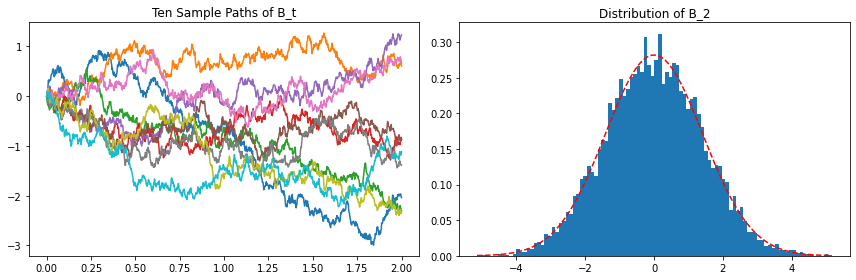

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def generate_sample_path(num_paths, num_steps, end_time, start_time=0, start_position=0, seed=None):
    if seed is not None:
        np.random.seed(seed)
        
    Z = np.random.normal( 0., 1., ( num_paths, num_steps ) )
    dB = np.zeros( ( num_paths, num_steps ) )
    B = np.zeros( ( num_paths, num_steps + 1 ) )  
     
    t = np.linspace( start_time, end_time, num_steps + 1 )
    dt = t[1] - t[0]
    sqrt_dt = np.sqrt(dt)
    for i in range(num_steps):
        if num_paths > 1:
            Z[:,i] = ( Z[:,i] - Z[:,i].mean() ) / Z[:,i].std()
        dB[:,i] = Z[:,i] * sqrt_dt
        B[:,i+1] = B[:,i] + dB[:,i]
    return t, B + start_position, dB

def main():
    num_paths = 10_000
    num_steps = 1_000
    T = 2
    
    t, B, _ = generate_sample_path(num_paths, num_steps, T, seed=0) 
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
    
    ax0.set_title(f'Ten Sample Paths of B_t')
    ax0.plot(t, B[:10].T)
    
    ax1.set_title(f'Distribution of B_{T}')
    _, bins_loc, _ = ax1.hist(B[:,-1], bins=100, density=True)
    x = bins_loc
    y = stats.norm(loc=0, scale=np.sqrt(T)).pdf(x)
    ax1.plot(x, y,'--r')
    
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

######***Filtration***

Let $(\Omega,{\cal F},\mathbb{P})$ be a probability space on which is defined a Brownian motion $W(t)$, $t\ge 0$.
A filtration for the Brownian motion is a collection of $\sigma$-fields ${\cal F}(t)$, $t\ge 0$, satisfying:

(1) (Information accumulates) For $0\le s<t$
every set in ${\cal F}(s)$ is also in ${\cal F}(t)$. 
In other words, the information accumulates.
$$
{\cal F}(s)\subset{\cal F}(t)
$$

(2) (Adaptivity) For each $t\ge0$, the Brownian motion $W(t)$ at time $t$ is ${\cal F}(t)$-measumble. In other words, the information available at time $t$ is at least as much as one would learn from observing the Brownian motion up to time $t$.


(3) (Independence of future increments) For $0 \le t < u$, the increment $W ( u ) - W ( t )$ is independent of ${\cal F}(t)$. In other words, 
the information available at time $t$ is of no use in predicting future movements of the Brownian motion.

In the asset-pricing models we build, this independence property leads to the efficient market hypothesis.

######***Adapted Process***

Let $\Delta(t)$, $t\ge0$, be a stochastic process. We say that $\Delta(t)$ is adapted to the filtration ${\cal F}(t)$ if for each $t\ge0$ the random variable $\Delta(t)$ is ${\cal F}(t)$-measumble.

The adapted processes we encounter will serve as integrands, and for this one needs them to be jointly measurable in $t$ and $\omega$ so that their integrals are defined and are themselves adapted processes. This is a technical requirement that we shall ignore in this text.

###### ***Moments of Brownian Motion***

***Moment Generating Function of Normal Distribution***

If $X\sim N(\mu,\sigma^2)$, then 

$$\begin{array}{lll}
\displaystyle
\phi(t)=
\mathbb{E}e^{tX}
=
e^{\mu t+\frac{1}{2}\sigma^2t^2}
\end{array}$$

***Proof***

$$
\begin{array}{lll}
\phi_{N(\mu,\sigma ^2)}(t)
&=&\displaystyle
\int_{-\infty}^{\infty}e^{tx}\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}dx\nonumber\\
&=&\displaystyle 
e^{\mu t+\frac{1}{2}\sigma ^2t^2}\int_{-\infty}^{\infty}\underbrace{\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-(\mu+\sigma ^2t))^2}{2\sigma ^2}}}_{\mbox{PDF of $N(\mu+\sigma ^2t,\sigma ^2)$}}dx=e^{\mu t+\frac{1}{2}\sigma ^2t^2}\nonumber
\end{array}
$$

***Moments of Brownian Motion***

$$\begin{array}{lll}
\displaystyle
\mathbb{E}B_T^k
&=&
0&&\text{for odd moments}\\
\displaystyle
\mathbb{E}B_T^{2k}
&=&\displaystyle
\frac{(2k)!T^k}{k!2^k}&&\text{for even moments}
\end{array}$$

***Proof***

We expand the identity $
\phi(\theta)=
\mathbb{E}e^{\theta B_T}
=
e^{\frac{1}{2}T\theta^2}
$:

$$\begin{array}{lll}
\displaystyle
\mathbb{E}e^{\theta B_T}
=
\sum_{k=0}^\infty \mathbb{E}\frac{\left(\theta B_T\right)^k}{k!}
=
\sum_{k=0}^\infty \frac{\mathbb{E}B_T^k}{k!}\theta^k
\end{array}$$

$$\begin{array}{lll}
\displaystyle
e^{\frac{1}{2}T\theta^2}
=
\sum_{k=0}^\infty \frac{\left(\frac{1}{2}T\theta^2\right)^k}{k!}
=
\sum_{k=0}^\infty \frac{T^k}{k!2^k}\theta^{2k}
\end{array}$$

We compare the coefficient of $\theta^k$.



###### ***Joint Distribution of $M(t)=
\max_{0\le s\le t}W(t)$ and $W(t)$***

$$\begin{array}{lll}
\displaystyle
f_{M(t),W(t)}\left(m,w\right)
&=&\displaystyle
\frac{2(2m-w)}{t\sqrt{2\pi t}}e^{-\frac{(2m-w)^2}{2t}},\quad m\ge w,\ m>0\\
\\
\displaystyle
f_{M(t)|W(t)}\left(m|w\right)
&=&\displaystyle
\frac{2(2m-w)}{t}e^{-\frac{2m(m-w)}{2t}},\quad m\ge w,\ m>0\\
\end{array}$$

***Reflection Principle***

$$\begin{array}{lll}
\displaystyle
\mathbb{P}\left(M(t)\ge m,W(t)\le w\right)
&=&\displaystyle
\int_m^\infty dx\int_{-\infty}^w dy \left[f_{M(t),W(t)}\left(x,y\right)\right]\\
\displaystyle
\mathbb{P}\left(M(t)\ge m,W(t)\le w\right)
&=&\displaystyle
\mathbb{P}\left(\tau_m\le t,W(t)-W(\tau_m)\le w-m\right)\\
&=&\displaystyle
\mathbb{P}\left(\tau_m\le t,W(t)-W(\tau_m)\ge m-w\right)\\
&=&\displaystyle
\mathbb{P}\left(\tau_m\le t,W(t)\ge 2m-w\right)\\
&=&\displaystyle
\mathbb{P}\left(W(t)\ge 2m-w\right)\\
\end{array}$$

######***Martingale***

***$B_t$ is Martingale***

For $t_1<t_2$,

$$\begin{array}{lll}
\displaystyle
\mathbb{E}^{\mathbb{P}}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
&=&\displaystyle
\mathbb{E}^{\mathbb{P}}\left[B_{t_1}+\left(B_{t_2}-B_{t_1}\right)\Big{|}{\cal F}_{t_1}\right]
\quad\left(B_{t_1}\in{\cal F}_{t_1}\right)\\
&=&\displaystyle
B_{t_1}+\mathbb{E}^{\mathbb{P}}\left[\left(B_{t_2}-B_{t_1}\right)\Big{|}{\cal F}_{t_1}\right]
\quad\left(\left(B_{t_2}-B_{t_1}\right)\perp{\cal F}_{t_1}\right)\\
&=&\displaystyle
B_{t_1}+\mathbb{E}^{\mathbb{P}}\left[\left(B_{t_2}-B_{t_1}\right)\right]\\
&=&\displaystyle
B_{t_1}\\
\end{array}$$

***$B_t^2 - t$ is Martingale***

For $t_1<t_2$,

$$\begin{array}{lll}
\displaystyle
\mathbb{E}^{\mathbb{P}}\left[B_{t_2}^2\Big{|}{\cal F}_{t_1}\right]
&=&\displaystyle
\mathbb{E}^{\mathbb{P}}\left[\left(B_{t_2}-B_{t_1}\right)^2-B_{t_1}^2+2B_{t_1}B_{t_2}\Big{|}{\cal F}_{t_1}\right]
\quad\left(B_{t_1}\in{\cal F}_{t_1}\right)\\
&=&\displaystyle
\mathbb{E}^{\mathbb{P}}\left[\left(B_{t_2}-B_{t_1}\right)^2\Big{|}{\cal F}_{t_1}\right]
-B_{t_1}^2
+2B_{t_1}\mathbb{E}^{\mathbb{P}}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
\quad\left(\left(B_{t_2}-B_{t_1}\right)\perp{\cal F}_{t_1}\right)\\
&=&\displaystyle
\left(t_2-t_1\right)
-B_{t_1}^2
+2B_{t_1}\mathbb{E}^{\mathbb{P}}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
\quad\left(\text{$B_t$ Martingale}\right)\\
&=&\displaystyle
\left(t_2-t_1\right)
-B_{t_1}^2
+2B_{t_1}^2
\quad\left(\text{$B_t$ Martingale}\right)\\
&=&\displaystyle
B_{t_1}^2-t_1+t_2\\
\end{array}$$

Therefore,

$$\begin{array}{lll}
\displaystyle
\mathbb{E}^{\mathbb{P}}\left[B_{t_2}^2-t_2\Big{|}{\cal F}_{t_1}\right]
&=&\displaystyle
B_{t_1}^2-t_1\\
\end{array}$$

***$B_t^3 - 3tB_t$ is Martingale***

For $t_1<t_2$,

$$\begin{array}{lll}
\displaystyle
\mathbb{E}\left[B_{t_2}^3\Big{|}{\cal F}_{t_1}\right]
&=&\displaystyle
\mathbb{E}\left[\left(B_{t_2}-B_{t_1}\right)^3+3B_{t_1}B_{t_2}^2-3B_{t_1}^2B_{t_2}+B_{t_1}^3\Big{|}{\cal F}_{t_1}\right]
\quad\left(B_{t_1}\in{\cal F}_{t_1}\right)\\
&=&\displaystyle
\mathbb{E}\left[\left(B_{t_2}-B_{t_1}\right)^3\Big{|}{\cal F}_{t_1}\right]
+3B_{t_1}
\mathbb{E}\left[B_{t_2}^2\Big{|}{\cal F}_{t_1}\right]
-3B_{t_1}^2
\mathbb{E}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
+B_{t_1}^3
\quad\left(\left(B_{t_2}-B_{t_1}\right)\perp{\cal F}_{t_1}\right)\\
&=&\displaystyle
3B_{t_1}
\mathbb{E}\left[B_{t_2}^2\Big{|}{\cal F}_{t_1}\right]
-3B_{t_1}^2
\mathbb{E}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
+B_{t_1}^3
\quad\left(\text{$B_t$, $B_t^2-t$ Martingale}\right)\\
&=&\displaystyle
3B_{t_1}
\mathbb{E}\left[B_{t_2}^2-t_2\Big{|}{\cal F}_{t_1}\right]+3B_{t_1}t_2
-3B_{t_1}^2
\mathbb{E}\left[B_{t_2}\Big{|}{\cal F}_{t_1}\right]
+B_{t_1}^3
\quad\left(\text{$B_t$, $B_t^2-t$ Martingale}\right)\\
&=&\displaystyle
3B_{t_1}
\left(B_{t_1}^2-t_1\right)+3B_{t_1}t_2
-3B_{t_1}^3
+B_{t_1}^3\\
&=&\displaystyle
B_{t_1}^3-3t_1B_{t_1}+3t_2B_{t_1}
\\
&=&\displaystyle
B_{t_1}^3-3t_1B_{t_1}
+\mathbb{E}\left[3t_2B_{t_2}\Big{|}{\cal F}_{t_1}\right]
\end{array}$$

Therefore,

$$\begin{array}{lll}
\displaystyle
\mathbb{E}^{\mathbb{P}}\left[B_{t_2}^3-3t_2B_{t_2}\Big{|}{\cal F}_{t_1}\right]
&=&\displaystyle
B_{t_1}^3-3t_1B_{t_1}\\
\end{array}$$

***$e^{-\frac{1}{2}\theta^2 t-\theta B_t}$ is Martingale, called Exponential Martingale***

***Taylor Expansion***

$$\begin{array}{lll}
\displaystyle
Z_t=
e^{-\frac{1}{2}\theta^2 t-\theta B_t}
=
1+\left(-\frac{1}{2}\theta^2 t-\theta B_t\right)+\frac{1}{2}\left(-\frac{1}{2}\theta^2 t-\theta B_t\right)^2
+\frac{1}{6}\left(-\frac{1}{2}\theta^2 t-\theta B_t\right)^3+\cdots
\end{array}$$

***Relations between Exponential Martingale and Other Brownian Martingales***

$$\begin{array}{lll}
\displaystyle
\text{Whole}&&\displaystyle e^{-\frac{1}{2}\theta^2 t-\theta B_t}&&\text{Martingale}\\
\\
\text{Coefficient of $\theta^0$}&&\displaystyle 1&&\text{Martingale}\\
\\
\text{Coefficient of $\theta^1$}&&\displaystyle B_t&&\text{Martingale}\\
\\
\text{Coefficient of $\theta^2$}&&\displaystyle B_t^2-t&&\text{Martingale}\\
\\
\text{Coefficient of $\theta^3$}&&\displaystyle B_t^3-3tB_t&&\text{Martingale}\\
\\
\vdots
\end{array}$$

***$e^{-\frac{1}{2}\int_0^t\theta^2ds-\int_0^t\theta dB_s}$ is Martingale, called Exponential Martingale***

We will see this martinale when we discuss Girsanov Theorem.

###### ***First Passage Time***

***First Passage Time***

$$\begin{array}{lll}
\displaystyle
\tau_m
&=&\displaystyle
\min\{t:W(t)=m\}
\end{array}$$

***Reflection Principle***

$$\begin{array}{lll}
\displaystyle
\mathbb{P}\left(\tau_m\le t\right)
&=&\displaystyle
2\mathbb{P}\left(W(t)\ge |m|\right)\\
\displaystyle
f_{\tau_m}(t)
&=&\displaystyle
\frac{|m|}{t\sqrt{2\pi t}}e^{-\frac{m^2}{2t}},\quad t\ge 0
\end{array}$$

***Exponential Martingale***

For $\alpha>0$

$$\begin{array}{lll}
\displaystyle
\mathbb{E}e^{-\alpha\tau_m}
&=&\displaystyle
e^{-|m|\sqrt{2\alpha}}\\
\displaystyle
\mathbb{E}\tau_me^{-\alpha\tau_m}
&=&\displaystyle
\frac{|m|}{\sqrt{2\alpha}}e^{-|m|\sqrt{2\alpha}}\\
\displaystyle
\mathbb{E}\tau_m
&=&\displaystyle
\infty
\end{array}$$



###***Chapter 2 Ito Lemma***

###### Application to Forward Contracts

$$
F=Se^{r(T-t)}
$$

$$\begin{array}{lll}
dF
&=&\displaystyle
F_SdS+F_tdt+\frac{1}{2}F_{SS}(dS)^2+\frac{1}{2}F_{tt}(dt)^2
+F_{St}(dS)(dt)\\
&=&\displaystyle
\frac{F}{S}\left(rSdt+\sigma Sdz^{\mathbb{Q}}\right)-rFdt\\
&=&\displaystyle
\sigma Fdz^{\mathbb{Q}}
\end{array}$$

Exercise. Compute $dF$ using $dz^{\mathbb{P}}$, instead of $dz^{\mathbb{Q}}$.

###***Chapter 3 SDE***

###### SDE for Brownian Motion


Solve the following SDE:
$$
dB_t\quad\text{with}\quad B_0=0
$$





$$
\int_0^TdB_t
$$
$$
\int_0^TdB_t=\sum dB_t=(B_{dt}-B_0)+(B_{2dt}-B_{dt})+\cdots+(B_T-B_{T-dt})=B_T-B_0=B_T
$$

###### SDE for Drifted  Brownian Motion


Solve the following SDE:
$$
dX_t=\mu dt+\sigma dB_t\quad\text{with given}\ X_0
$$





$$
\int_0^TdX_t=\mu \int_0^Tdt+\sigma \int_0^TdB_t
$$

$$\begin{array}{lll}
\int_0^TdX_t
&=&\sum dX_t=(X_{dt}-X_0)+(X_{2dt}-X_{dt})+\cdots+(X_T-X_{T-dt})=X_T-X_0\\
\int_0^Tdt
&=&\sum dt=(dt-0)+(2dt-dt)+\cdots+(T-(T-dt))=T\\
\int_0^TdB_t
&=&\sum dB_t=B_T
\end{array}$$

$$
X_T-X_0=\mu T+\sigma B_T
\quad\Rightarrow\quad
X_T=X_0+\mu T+\sigma B_T
$$

###### SDE for Stock Price Move

Solve the following SDE:
$$
\frac{dS}{S}=\mu dt+\sigma db\quad\text{with given $S_0$}
$$

$$\begin{array}{lll}
\text{Change of variable}
&&
f=\log s\\
\text{Ito lemma for $f$}\quad
&&
df
=\left(\mu-\frac{1}{2}\sigma^2 \right)dt+\sigma db
\end{array}$$

$$
df=\left(\mu-\frac{1}{2}\sigma^2 \right)dt+\sigma db
\quad\Rightarrow\quad
\int_0^Tdf=\left(\mu-\frac{1}{2}\sigma^2 \right)\int_0^Tdt+\sigma \int_0^Tdb
$$

$$\begin{array}{lll}
\int_0^Tdf
&=&\sum df=(f_{dt}-f_0)+\cdots+(f_T-f_{T-dt})=f_T-f_0=\log S_T-\log S_0\\
\int_0^Tdt
&=&T\\
\int_0^TdB_t
&=&B_T
\end{array}$$

$$
\log S_T-\log S_0=\left(\mu-\frac{1}{2}\sigma^2 \right)T+\sigma B_T
\quad\Rightarrow\quad
S_T=S_0 e^{(\mu-\frac{1}{2}\sigma^2)T+\sigma B_T}
$$

###### SDE for Short Rate Move

Solve the following SDE:
$$dr=a(b-r)dt+\sigma db\quad\text{with given $r_0$}$$

$$\begin{array}{lll}
\text{Integral factor $g=g(t)$}\quad\quad\quad\quad\quad\quad\quad\quad
&&
f=f(t,r)=g(t)*r\\
\text{Choose $g$ with $g'-ag=0$; $g=g(t)=e^{at}$}&&
df
=
\left(abg+(g'-ag)r\right)dt+\left(\sigma g\right)db\\
&&\quad\  =
abe^{at}dt+\sigma e^{at}db
\end{array}$$

$$
abe^{at}dt+\sigma e^{at}db
\quad\Rightarrow\quad
\int_0^Tdf=ab\int_0^Te^{at}dt+\sigma\int_0^Te^{at}db
$$

$$\begin{array}{lll}
\int_0^Tdf
&=&f_T-f_0=e^{aT}r_T-r_0\\
\int_0^Te^{at}dt
&=&\frac{e^{aT}-1}{a}\\
\int_0^Te^{at}dB_t
&=&\sum e^{at}dB_t=(B_{dt}-B_0)+\cdots+e^{a(T-dt)}(B_T-B_{T-dt})=\int_0^Te^{at}dB_t
\end{array}$$

$$
e^{aT}r_T-r_0
=b(e^{aT}-1)+\sigma\int_0^Te^{at}dB_t
\quad\Rightarrow\quad
r_T=r_0e^{-aT}+b(1-e^{-aT})+\sigma\int_0^Te^{-a(T-t)}dB_t
$$

###***Chapter 4 PDE***

###### ***Diffusion Equation***

$$
\displaystyle
\frac{\partial f}{\partial t}
=
\frac{D}{2}\frac{\partial^2 f}{\partial x^2}
$$

***Number of particles at near future***

$$\begin{array}{lll}
f(x,t)dx&&\text{Number of particles in $[x,x+dx]$ at time $t$}\\
\Delta&&\text{Random Position Change}\\
\phi(\Delta)d\Delta&&\text{Probability of Random Position Change}
\end{array}$$

$$
\displaystyle
f(x,t+\tau)dx
=
\int_{-\infty}^{\infty}\left[f(x-\Delta,t)dx\right]\phi(\Delta)d\Delta
$$

$$
\displaystyle
f(x,t+\tau)=\int_{-\infty}^{\infty}f(x-\Delta,t)\phi(\Delta)d\Delta
$$

***Taylor expansion***

$$\begin{array}{lll}
\text{First Order Approximation}&&f(x,t+\tau)=\displaystyle f(x,t)+\frac{\partial f}{\partial t}\tau\\
\text{Second Order Approximation}&&f(x-\Delta,t)=\displaystyle f(x,t)-\frac{\partial f}{\partial x}\Delta+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}\Delta^2\\
\end{array}$$

***Derivation of Diffusion Equation***

$$\begin{array}{llllllll}
\displaystyle 
f(x,t)+\frac{\partial f}{\partial t}\tau
&=&
\displaystyle
\int_{-\infty}^{\infty}\left[f(x,t)-\frac{\partial f}{\partial x}\Delta+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}\Delta^2\right]\phi(\Delta)d\Delta\\
&=&
\displaystyle
f(x,t)\int_{-\infty}^{\infty}\phi(\Delta)d\Delta
-
\frac{\partial f}{\partial x}
\int_{-\infty}^{\infty}\Delta\phi(\Delta)d\Delta
+
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta\\
\end{array}$$

Since $\phi(\Delta)$ is a probability density function,
$$
\frac{\partial f}{\partial t}\tau
=
\displaystyle
-
\frac{\partial f}{\partial x}
\int_{-\infty}^{\infty}\Delta\phi(\Delta)d\Delta
+
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta
$$

Since $\phi(\Delta)$ is even,
$$
\displaystyle
\frac{\partial f}{\partial t}\tau
=
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta
$$

with $$D=\frac{1}{\tau}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta$$ 
we have
$$
\displaystyle
\frac{\partial f}{\partial t}
=
\frac{D}{2}\frac{\partial^2 f}{\partial x^2}
$$

***Diffusion coefficient***

$D$ is the variance of random position change during the unit time.

***Physical interpretation of diffusion equation***

$$\begin{array}{lll}
\displaystyle\frac{\partial f}{\partial t}&=&\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}\\
\displaystyle\frac{\partial^2 f}{\partial x^2}&=&\displaystyle\frac{f(x+\Delta,t)-2f(x,t)+f(x-\Delta,t)}{\Delta^2}\\
\end{array}$$

$$
\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}
=
\frac{1}{2}D\frac{f(x+\Delta,t)-2f(x,t)+f(x-\Delta,t)}{\Delta^2}
$$

$$
\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}
=
\frac{D}{\Delta^2}\left[\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}-f(x,t)\right]
$$

If there are more particles around $x$, that is, if $\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}>f(x,t)$, the number of particles at $x$ increases.

If there are less particles around $x$, that is, if $\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}<f(x,t)$, the number of particles at $x$ decreases.

###### ***Solution***

***Diffusion equation***

$$
\displaystyle
\frac{\partial u}{\partial t}
=
\kappa\frac{\partial^2 u}{\partial x^2}
$$

***Similarity transformation***

$$\begin{array}{lll}
z&=&e^ax\\
s&=&e^bt\\
v(z,s)&=&e^cu(e^ax,e^bt)\\
\end{array}$$

We look for an invariant transformation under which our PDE is unchanged.
In other word, if $u(x,t)$ satisfies the diffusion equation, so does $e^cu(e^ax,e^bt)$.
$$
\displaystyle
\frac{\partial v(z,s)}{\partial t}
=
\kappa\frac{\partial^2 v(z,s)}{\partial x^2}
$$

$$
\displaystyle
\frac{\partial v(z,s)}{\partial t}
=
\frac{\partial e^cu(e^ax,e^bt)}{\partial t}
=
\frac{\partial e^cu(e^ax,e^bt)}{\partial s}
\frac{\partial s}{\partial t}
=
\frac{\partial e^cu(e^ax,e^bt)}{\partial s}e^{b}
=
\frac{\partial u(e^ax,e^bt)}{\partial s}e^{c+b}
$$

$$\begin{array}{lllllllllll}
\displaystyle
\frac{\partial v(z,s)}{\partial x}
&=&\displaystyle
\frac{\partial e^cu(e^ax,e^bt)}{\partial z}\frac{\partial z}{\partial x}
&=&\displaystyle
\frac{\partial e^cu(e^ax,e^bt)}{\partial z}e^{a}
&=&\displaystyle
\frac{\partial u(e^ax,e^bt)}{\partial z}e^{c+a}\\
\displaystyle
\frac{\partial^2 v(z,s)}{\partial x^2}
&=&\displaystyle
\frac{\partial^2 u(e^ax,e^bt)}{\partial x\partial z}e^{c+a}
&=&\displaystyle
\frac{\partial^2 u(e^ax,e^bt)}{\partial z^2}\frac{\partial z}{\partial x}e^{c+a}
&=&\displaystyle
\frac{\partial^2 u(e^ax,e^bt)}{\partial z^2}e^{c+2a}\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\frac{\partial v(z,s)}{\partial t}
=
\kappa\frac{\partial^2 v(z,s)}{\partial x^2}
&\Rightarrow&\displaystyle
\frac{\partial u(e^ax,e^bt)}{\partial s}e^{c+b}
=
\kappa
\frac{\partial^2 u(e^ax,e^bt)}{\partial z^2}e^{c+2a}\\
&\Rightarrow&\displaystyle
\frac{\partial u(z,s)}{\partial s}e^{c+b}
=
\kappa
\frac{\partial^2 u(z,s)}{\partial z^2}e^{c+2a}\\
&\Rightarrow&
e^{c+b}
=
e^{c+2a}\\
&\Rightarrow&
b
=
2a\\
\end{array}$$

***Invariance under similarity transformation***

$$
vs^{-c/b}=e^cu\left(e^bt\right)^{-c/b}=ut^{-c/b}
$$

$$
zs^{-a/b}=e^ax\left(e^bt\right)^{-a/b}=xt^{-a/b}
$$

***Form of similarity solution***

Since $
zs^{-a/b}=xt^{-a/b}=\xi
$ is invariant under similarity transform, we look for the similarity solution of the following form:
$$
vs^{-c/b}=ut^{-c/b}=f(\xi)
$$
or, since $b=2a$,
$$
u(x,t)=t^{c/b}f(\xi)=t^{c/b}f\left(\frac{x}{\sqrt{t}}\right)
$$

***Variable reduction***

$$\begin{array}{llllll}
\displaystyle\frac{\partial u}{\partial t}
&=&\displaystyle
\frac{c}{b}t^{(c/b)-1}f(\xi)-\frac{1}{2}t^{c/b}f'(\xi)xt^{-3/2}
=
\frac{c}{b}t^{(c/b)-1}f(\xi)-\frac{1}{2}t^{c/b}f'(\xi)\xi t^{-1}
=
t^{(c/b)-1}\left[\frac{c}{b}f(\xi)-\frac{1}{2}\xi f'(\xi)\right]\\
\displaystyle\frac{\partial u}{\partial x}
&=&\displaystyle
t^{c/b}f'(\xi)t^{-1/2}\\
\displaystyle\frac{\partial^2 u}{\partial x^2}
&=&\displaystyle
t^{c/b}f''(\xi)t^{-1}
=
t^{(c/b)-1}f''(\xi)\\
\end{array}$$

$$\begin{array}{lllll}
\displaystyle
\frac{\partial u}{\partial t}
=
\kappa\frac{\partial^2 u}{\partial x^2}
&\Rightarrow&\displaystyle
t^{(c/b)-1}\left[\frac{c}{b}f(\xi)-\frac{1}{2}\xi f'(\xi)\right]=\kappa t^{(c/b)-1}f''(\xi)\\
&\Rightarrow&\displaystyle
\frac{c}{b}f(\xi)-\frac{1}{2}\xi f'(\xi)=\kappa f''(\xi)\\
&\Rightarrow&\displaystyle
\kappa f''(\xi)+\frac{1}{2}\xi f'(\xi)-\frac{c}{b}f(\xi)=0\\
\end{array}$$

For a linear equation like this, the ratio $c/b$ is not determined by the equation
and we have some flexibility to use in meeting boundary conditions.

***Fundamental Solution***

With the choice $c/b=-1/2$
$$\begin{array}{lllll}
\displaystyle
\kappa f''(\xi)+\frac{1}{2}\xi f'(\xi)-\frac{c}{b}f(\xi)=0
&\Rightarrow&\displaystyle
\kappa f''(\xi)+\frac{1}{2}\xi f'(\xi)+\frac{1}{2}f(\xi)=0\\
&\Rightarrow&\displaystyle
\kappa f''(\xi)+\frac{1}{2}\left(\xi f(\xi)\right)'=0\\
&\Rightarrow&\displaystyle
\kappa f'(\xi)+\frac{1}{2}\xi f(\xi)=0\\
&\Rightarrow&\displaystyle
\frac{df}{f}=-\frac{1}{2\kappa}\xi d\xi\\
&\Rightarrow&\displaystyle
\log f=-\frac{1}{4\kappa}\xi^2\\
&\Rightarrow&\displaystyle
f=e^{-\frac{1}{4\kappa}\xi^2}\\
&\Rightarrow&\displaystyle
u(x,t)=\frac{1}{\sqrt{t}}e^{-\frac{1}{4\kappa t}x^2}\\
&\Rightarrow&\displaystyle
u(x,t)=\frac{1}{\sqrt{4\pi\kappa t}}e^{-\frac{1}{4\kappa t}x^2}\\
\end{array}$$

$$
\displaystyle
u_{x_0}(x,t)=\frac{1}{\sqrt{4\pi\kappa t}}e^{-\frac{\left(x-x_0\right)^2}{4\kappa t}}
$$

***General solution***

$$
\displaystyle
u(x,t)=\int u_{x_0}(x,t)p\left(x_0\right)dx_0
$$

######***Diffusion equation with drift***

***Diffusion equation with drift***

$$
\displaystyle
\frac{\partial f}{\partial t}
=
D\frac{\partial^2 f}{\partial x^2}-\mu\frac{\partial f}{\partial x}
$$

***Number of particles at near future***

$$\begin{array}{lll}
f(x,t)dx&&\text{Number of particles in $[x+x+dx]$ at time $t$}\\
\Delta&&\text{Random Position Change}\\
\phi(\Delta)d\Delta&&\text{Probability of Random Position Change}
\end{array}$$

$$
\displaystyle
f(x,t+\tau)dx
=
\int_{-\infty}^{\infty}\left[f(x-\Delta,t)dx\right]\phi(\Delta)d\Delta
$$

$$
\displaystyle
f(x,t+\tau)=\int_{-\infty}^{\infty}f(x-\Delta,t)\phi(\Delta)d\Delta
$$

***Taylor expansion***

$$\begin{array}{lll}
\text{First Order Approximation}&&f(x,t+\tau)=\displaystyle f(x,t)+\frac{\partial f}{\partial t}\tau\\
\text{Second Order Approximation}&&f(x-\Delta,t)=\displaystyle f(x,t)-\frac{\partial f}{\partial x}\Delta+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}\Delta^2\\
\end{array}$$

***Derivation of Diffusion equation with drift***

$$\begin{array}{llllllll}
\displaystyle 
f(x,t)+\frac{\partial f}{\partial t}\tau
&=&
\displaystyle
\int_{-\infty}^{\infty}\left[f(x,t)-\frac{\partial f}{\partial x}\Delta+\frac{1}{2}\frac{\partial^2 f}{\partial x^2}\Delta^2\right]\phi(\Delta)d\Delta\\
&=&
\displaystyle
f(x,t)\int_{-\infty}^{\infty}\phi(\Delta)d\Delta
-
\frac{\partial f}{\partial x}
\int_{-\infty}^{\infty}\Delta\phi(\Delta)d\Delta
+
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta\\
\end{array}$$

Since $\phi(\Delta)$ is a probability density function,
$$
\frac{\partial f}{\partial t}\tau
=
\displaystyle
-
\frac{\partial f}{\partial x}
\int_{-\infty}^{\infty}\Delta\phi(\Delta)d\Delta
+
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta
$$

with $$\mu=\frac{1}{\tau}
\int_{-\infty}^{\infty}\Delta\phi(\Delta)d\Delta$$ 
we have
$$
\displaystyle
\frac{\partial f}{\partial t}
=
-\mu
\frac{\partial f}{\partial x}
+
\frac{1}{2}\frac{\partial^2 f}{\partial x^2}\frac{1}{\tau}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta
$$

with $$D=\frac{1}{2\tau}
\int_{-\infty}^{\infty}\Delta^2\phi(\Delta)d\Delta$$ 
we have
$$
\displaystyle
\frac{\partial f}{\partial t}
=
D\frac{\partial^2 f}{\partial x^2}-\mu\frac{\partial f}{\partial x}
$$

***Physical interpretation of diffusion equation with drift***

$$\begin{array}{lll}
\displaystyle\frac{\partial f}{\partial t}&=&\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}\\
\displaystyle\frac{\partial f}{\partial x}&=&\displaystyle\frac{f(x+\Delta,t)-f(x-\Delta,t)}{2\Delta}\\
\displaystyle\frac{\partial^2 f}{\partial x^2}&=&\displaystyle\frac{f(x+\Delta,t)-2f(x,t)+f(x-\Delta,t)}{\Delta^2}\\
\end{array}$$

$$
\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}
=
D\frac{f(x+\Delta,t)-2f(x,t)+f(x-\Delta,t)}{\Delta^2}
-\mu \frac{f(x+\Delta,t)-f(x-\Delta,t)}{2\Delta}
$$

$$
\displaystyle\frac{f(x,t+\tau)-f(x,t)}{\tau}
=
\frac{2D}{\Delta^2}\left[\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}-f(x,t)\right]
+\frac{\mu}{2\Delta}\left[f(x-\Delta,t)-f(x+\Delta,t)\right]
$$

If there are more particles around $x$, that is, if $\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}>f(x,t)$, the number of particles at $x$ increases.

If there are less particles around $x$, that is, if $\frac{f(x+\Delta,t)+f(x-\Delta,t)}{2}<f(x,t)$, the number of particles at $x$ decreases.

If there is a positive drift $\mu>0$, gains particles from left but loses to right.

If there is a negativee drift $\mu<0$, gains particles from right but loses to left.

###### ***Solution***

***Diffusion equation***

$$
\displaystyle
\frac{\partial u}{\partial t}
=
\kappa\frac{\partial^2 u}{\partial x^2}
\quad\Rightarrow\quad
\frac{\partial v}{\partial t}
=
\kappa\frac{\partial^2 v}{\partial x^2}
-\mu\frac{\partial v}{\partial x}
$$

***Fundamental Solution***

$$
\displaystyle
u_{x_0}(x,t)=\frac{1}{\sqrt{4\pi  \kappa t}}e^{-\frac{\left(x-x_0\right)^2}{4\kappa t}}
\quad\Rightarrow\quad
v_{x_0}(x,t)=\frac{1}{\sqrt{4\pi  \kappa t}}e^{-\frac{\left(x-\left(x_0+\mu t\right)\right)^2}{4\kappa t}}
$$

$$\begin{array}{lll}
v(x,t)&=&u(x-\mu t,t)
\end{array}$$

If $u$ satisfies the diffusion equation, $v$ satisfies the diffusion equation with drift.

$$
\displaystyle
\frac{\partial v(x,t)}{\partial t}
=
-\mu\frac{\partial u(x-\mu t,t)}{\partial x}+\frac{\partial u(x-\mu t,t)}{\partial t}
$$

$$
\displaystyle
\frac{\partial v(x,t)}{\partial x}
=
\frac{\partial u(x-\mu t,t)}{\partial x}
$$

$$
\displaystyle
\frac{\partial^2 v(x,t)}{\partial x^2}
=
\frac{\partial^2 u(x-\mu t,t)}{\partial x^2}
$$

$$
\displaystyle
\frac{\partial v(x,t)}{\partial t}
=
-\mu\frac{\partial v(x,t)}{\partial x}+\frac{\partial^2 v(x,t)}{\partial x^2}
$$

***General solution***

$$
\displaystyle
v(x,t)=\int v_{x_0}(x,t)p\left(x_0\right)dx_0
$$

###***Chapter 5 PDE related to SDE***

######***PDE related to Markov Process***

***General SDE***
$$\begin{array}{lll}
dX_t&=&\mu\left(X_t,t\right)dt+\sigma\left(X_t,t\right)dB_t
\end{array}$$

***Transition Densition Function***
$$\begin{array}{lll}
x,\ t&&\text{Forward Variable}\\
x_0,\ t_0&&\text{Backward Variable}\\
p(x,t|x_0,t_0)&&\text{Transition Densition from $(x_0,t_0)$ to $(x,t)$}\\
\end{array}$$

***Fokker–Planck Equation or Kolmogorov Forward Equation for General SDE***

PDE for $p(x,t)=p(x,t|x_0,t_0)$ using forward variabled $x$ and $t$

$$\begin{array}{lll}
\displaystyle
\frac{\partial p(x,t)}{\partial t}
&=&\displaystyle
-\frac{\partial }{\partial x}\left(\mu(x,t) p(x,t)\right)
+
\frac{1}{2}\frac{\partial^2 }{\partial x^2}\left(\sigma^2(x,t)p(x,t)\right)\\
&=&\displaystyle
\left(-\frac{\partial }{\partial x}\mu(x,t) 
+
\frac{1}{2}\frac{\partial^2 }{\partial x^2}\sigma^2(x,t)\right)p(x,t)\\
&=&\displaystyle
L^*(x,t)p(x,t)\\
\end{array}$$
where
$$
L^*(x,t)=-\frac{\partial }{\partial x}\mu(x,t) 
+
\frac{1}{2}\frac{\partial^2 }{\partial x^2}\sigma^2(x,t)
$$

***Kolmogorov Backward Equation for General SDE***

PDE for $p(x_0,t_0)=p(x,t|x_0,t_0)$ using backward variabled $x_0$ and $t_0$

$$
\displaystyle
-\frac{\partial p(x_0,t_0)}{\partial t_0}
=L(x_0,t_0)p(x_0,t_0)
$$
where
$$
L(x_0,t_0)=\mu(x_0,t_0)\frac{\partial }{\partial x_0} 
+
\frac{1}{2}\sigma^2(x_0,t_0)\frac{\partial^2 }{\partial x_0^2}
$$

######***Fokker–Planck Equation***

***Fokker Planck Equation for Brownian motion***

$$
\displaystyle
\frac{\partial p}{\partial t}
=
\frac{1}{2}\frac{\partial^2 p}{\partial x^2}
$$

***Proof***

We applay Ito's lemma to $f(B_t)$ where $f$ is $C^2_c$.

$$
\displaystyle
df
=f_xdB_t+\frac{1}{2}f_{xx}dt
$$

$$
\displaystyle
\mathbb{E}\left[df\right]
=\mathbb{E}\left[f_xdB_t+\frac{1}{2}f_{xx}dt\right]
=\frac{1}{2}\mathbb{E}\left[f_{xx}\right]dt
$$

$$
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]
=\frac{1}{2}\mathbb{E}\left[f_{xx}\right]
$$

With the transition density function $p(x,t)=p(x,t|x_0,t_0)$
$$\begin{array}{lll}
\displaystyle
\mathbb{E}\left[f\right]
&=&\displaystyle
\int_{-\infty}^\infty f(x)p(x,t)dx\\
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]
&=&\displaystyle
\int_{-\infty}^\infty f(x)p_t(x,t)dx\\
\displaystyle
\mathbb{E}\left[f_{xx}\right]
&=&\displaystyle
\int_{-\infty}^\infty f''(x)p(x,t)dx\\
&=&\displaystyle
\left[f'(x)p(x,t)\right]_{-\infty}^\infty-\int_{-\infty}^\infty f'(x)p_x(x,t)dx\\
&=&\displaystyle
-\int_{-\infty}^\infty f'(x)p_x(x,t)dx\\
&=&\displaystyle
\int_{-\infty}^\infty f(x)p_{xx}(x,t)dx\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]
=\frac{1}{2}\mathbb{E}\left[f_{xx}\right]
&\Rightarrow&\displaystyle
\int_{-\infty}^\infty f(x)p_t(x,t)dx
=\frac{1}{2}\int_{-\infty}^\infty f(x)p_{xx}(x,t)dx\\
&\Rightarrow&\displaystyle
\int_{-\infty}^\infty f(x)\left[p_t(x,t)-\frac{1}{2}p_{xx}(x,t)\right]dx
=0\\
&\Rightarrow&\displaystyle
p_t(x,t)=\frac{1}{2}p_{xx}(x,t)\\
\end{array}$$

$$
\displaystyle
\frac{\partial p}{\partial t}
=
\frac{1}{2}\frac{\partial^2 p}{\partial x^2}
$$

***Fokker Planck Equation for general SDE***

$$
\displaystyle
\frac{\partial p}{\partial t}=-\frac{\partial \mu p}{\partial x}
+
\frac{1}{2}\frac{\partial^2 \sigma^2p}{\partial x^2}
$$

***Proof***

$$\begin{array}{lll}
dX_t&=&\mu\left(X_t,t\right)dt+\sigma\left(X_t,t\right)dB_t\\
\end{array}$$

We applay Ito's lemma to $f(X_t)$ where $f$ is $C^2_c$.

$$
\displaystyle
df=f_xdX_t+\frac{1}{2}f_{xx}dX_t^2
=f_x\left(\mu dt+\sigma dB_t\right)+\frac{1}{2}\sigma^2f_{xx}dt
=\left(\mu f_x +\frac{1}{2}\sigma^2f_{xx}\right)dt+\sigma f_x dB_t
$$

$$
\displaystyle
\mathbb{E}\left[df\right]=\mathbb{E}\left[\mu f_x\mu +\frac{1}{2}\sigma^2f_{xx}\right]dt
$$

$$
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]=\mathbb{E}\left[\mu f_x +\frac{1}{2}\sigma^2f_{xx}\right]
$$

With the transition density function $p(x,t)=p(x,t|x_0,t_0)$
$$\begin{array}{lll}
\displaystyle
\mathbb{E}\left[f\right]
&=&\displaystyle
\int_{-\infty}^\infty f(x)p(x,t)dx\\
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]
&=&\displaystyle
\int_{-\infty}^\infty f(x)p_t(x,t)dx\\
\displaystyle
\mathbb{E}\left[\mu f_x\right]
&=&\displaystyle
\int_{-\infty}^\infty \mu f'(x)p(x,t)dx
=-\int_{-\infty}^\infty f(x)\left(\mu p(x,t)\right)_xdx\\
\displaystyle
\mathbb{E}\left[\frac{1}{2}\sigma^2f_{xx}\right]
&=&\displaystyle
\int_{-\infty}^\infty \frac{1}{2}\sigma^2f''(x)p(x,t)dx
=
-\int_{-\infty}^\infty f'(x)\left(\frac{1}{2}\sigma^2p(x,t)\right)_xdx
=
\int_{-\infty}^\infty f(x)\left(\frac{1}{2}\sigma^2p(x,t)\right)_{xx}dx\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
\frac{d}{dt}\mathbb{E}\left[f\right]=\mathbb{E}\left[\mu f_x +\frac{1}{2}\sigma^2f_{xx}\right]
&\Rightarrow&\displaystyle
\int_{-\infty}^\infty f(x)p_t(x,t)dx=
-\int_{-\infty}^\infty f(x)\left(\mu p(x,t)\right)_xdx
+
\int_{-\infty}^\infty f(x)\left(\frac{1}{2}\sigma^2p(x,t)\right)_{xx}dx\\
&\Rightarrow&\displaystyle
\int_{-\infty}^\infty f(x)\left[p_t(x,t)+\left(\mu p(x,t)\right)_x
-
\left(\frac{1}{2}\sigma^2p(x,t)\right)_{xx}\right]dx=0\\
&\Rightarrow&\displaystyle
p_t(x,t)+\left(\mu p(x,t)\right)_x
-
\left(\frac{1}{2}\sigma^2p(x,t)\right)_{xx}=0\\
\end{array}$$

$$
\displaystyle
\frac{\partial p}{\partial t}=-\frac{\partial \mu p}{\partial x}
+
\frac{1}{2}\frac{\partial^2 \sigma^2p}{\partial x^2}
$$

***Example***

$$\begin{array}{lcc}
&\text{SDE}&\text{Fokker Planck}\\
\text{General SDE}&
\displaystyle dX_t=\mu\left(X_t,t\right)dt+\sigma\left(X_t,t\right)dB_t&
\displaystyle
\frac{\partial p}{\partial t}=-\frac{\partial \mu p}{\partial x}
+
\frac{1}{2}\frac{\partial^2 \sigma^2p}{\partial x^2}\\
\\
\text{Brownian Motion}&
\displaystyle dX_t=dB_t&
\displaystyle
\frac{\partial p}{\partial t}
=
\frac{1}{2}\frac{\partial^2 p}{\partial x^2}\\
\\
\text{Ornstein Uhlenbeck}&
\displaystyle dX_t=-\kappa X_t dt+\sigma dB_t&
\displaystyle
\frac{\partial p}{\partial t}
=
\kappa\frac{\partial x p}{\partial x}
+
\frac{1}{2}\sigma^2\frac{\partial^2 p}{\partial x^2}\\
\\
\text{Geometric Brownian Motion}&
\displaystyle dX_t=\mu X_t dt+\sigma X_tdB_t&
\displaystyle
\frac{\partial p}{\partial t}
=
-\mu\frac{\partial  x p}{\partial x}
+
\frac{1}{2}\sigma^2\frac{\partial^2 x^2p}{\partial x^2}
\end{array}$$

######***Kolmogorov Backward Equation***

***Kolmogorov Backward Equation for General SDE***

PDE for $p(x_0,t_0)=p(x,t|x_0,t_0)$ using backward variabled $x_0$ and $t_0$

$$
\displaystyle
-\frac{\partial p(x_0,t_0)}{\partial t_0}
=L(x_0,t_0)p(x_0,t_0)
$$
where
$$
L(x_0,t_0)=\mu(x_0,t_0)\frac{\partial }{\partial x_0} 
+
\frac{1}{2}\sigma^2(x_0,t_0)\frac{\partial^2 }{\partial x_0^2}
$$

***Proof***

Since $
p(x,t|x_0,t_0-h)
=
\int p(x,t|y_0,t_0)p(y_0,t_0|x_0,t_0-h)dy_0$,

$$
\displaystyle
\frac{p(x,t|x_0,t_0-h)-p(x,t|x_0,t_0)}{h}
=
\frac{1}{h}\left(
\int p(x,t|y_0,t_0)p(y_0,t_0|x_0,t_0-h)dy_0-p(x,t|x_0,t_0)
\right)
$$

Since $\int p(y_0,t_0|x_0,t_0-h)dy_0=1$, we have
$
p(x,t|x_0,t_0)
=
p(x,t|x_0,t_0)
\int p(y_0,t_0|x_0,t_0-h)dy_0
$. So,

$$
\displaystyle
\frac{p(x,t|x_0,t_0-h)-p(x,t|x_0,t_0)}{h}
=
\frac{1}{h}\left(
\int \left[p(x,t|y_0,t_0)-p(x,t|x_0,t_0)\right]p(y_0,t_0|x_0,t_0-h)dy_0
\right)
$$

We approximate $p(x,t|y_0,t_0)$ using the 2nd order Taylor expension at $x_0$.
Since
$$
\displaystyle
p(x,t|y_0,t_0)
=
p(x,t|x_0,t_0)+
\frac{\partial p(x,t|x_0,t_0)}{\partial x_0}\left(y_0-x_0\right)
+
\frac{1}{2}\frac{\partial^2 p(x,t|x_0,t_0)}{\partial x_0^2}\left(y_0-x_0\right)^2
$$

we have

$$
\displaystyle
\frac{p(x,t|x_0,t_0-h)-p(x,t|x_0,t_0)}{h}
=
\frac{\partial p(x,t|x_0,t_0)}{\partial x_0}
\frac{1}{h}\left(
\int \left(y_0-x_0\right)p(y_0,t_0|x_0,t_0-h)dy_0
\right)
+
\frac{1}{2}\frac{\partial^2 p(x,t|x_0,t_0)}{\partial x_0^2}
\frac{1}{h}\left(
\int \left(y_0-x_0\right)^2p(y_0,t_0|x_0,t_0-h)dy_0
\right)
$$

Let $h\rightarrow 0$. This is the Kolmogorov backward equation.

$$
\displaystyle
-\frac{\partial p(x,t|x_0,t_0)}{\partial t_0}
=
\mu\left(x_0,t_0\right)
\frac{\partial p(x,t|x_0,t_0)}{\partial x_0}
+
\frac{1}{2}\sigma^2\left(x_0,t_0\right)\frac{\partial^2 p(x,t|x_0,t_0)}{\partial x_0^2}
$$

where

$$\begin{array}{lll}
\displaystyle
\mu\left(x_0,t_0\right)
&=&\displaystyle
\lim_{h\rightarrow0}\frac{1}{h}\left(
\int \left(y_0-x_0\right)p(y_0,t_0|x_0,t_0-h)dy_0
\right)\\
\sigma^2\left(x_0,t_0\right)&=&\displaystyle
\lim_{h\rightarrow0}\frac{1}{h}\left(
\int \left(y_0-x_0\right)^2p(y_0,t_0|x_0,t_0-h)dy_0
\right)\\
\end{array}$$

Compare with Kolmogorov forward equation.

$$
\displaystyle
\frac{\partial p(x,t|x_0,t_0)}{\partial t}
=
-\frac{\partial }{\partial x}\left(\mu\left(x,t\right)p(x,t|x_0,t_0)\right)
+
\frac{1}{2}\frac{\partial^2 }{\partial x^2}\left(\sigma^2\left(x,t\right)p(x,t|x_0,t_0)\right)
$$

***Example***

$$\begin{array}{lcc}
&\text{SDE}&\text{Kolmogorov Backward}\\
\text{General SDE}&
\displaystyle dX_t=\mu\left(X_t,t\right)dt+\sigma\left(X_t,t\right)dB_t&
\displaystyle
-\frac{\partial p}{\partial t_0}=\mu\frac{\partial  p}{\partial x_0}
+
\frac{1}{2}\sigma^2\frac{\partial^2 p}{\partial x_0^2}\\
\\
\text{Brownian Motion}&
\displaystyle dX_t=dB_t&
\displaystyle
-\frac{\partial p}{\partial t_0}
=
\frac{1}{2}\frac{\partial^2 p}{\partial x_0^2}\\
\\
\text{Ornstein Uhlenbeck}&
\displaystyle dX_t=-\kappa X_t dt+\sigma dB_t&
\displaystyle
-\frac{\partial p}{\partial t_0}
=
-\kappa x_0\frac{\partial  p}{\partial x_0}
+
\frac{1}{2}\sigma^2\frac{\partial^2 p}{\partial x_0^2}\\
\\
\text{Geometric Brownian Motion}&
\displaystyle dX_t=\mu X_t dt+\sigma X_tdB_t&
\displaystyle
-\frac{\partial p}{\partial t_0}
=
\mu x_0\frac{\partial   p}{\partial x_0}
+
\frac{1}{2}\sigma^2 x_0^2\frac{\partial^2 p}{\partial x_0^2}
\end{array}$$

###***Chapter 6 PDE using SDE***

######***Feynman-Kac Formula***

***Feynman-Kac Formula***

Consider the partial differential equation
$$
{\frac {\partial u}{\partial t}}(x,t)+\mu (x,t){\frac {\partial u}{\partial x}}(x,t)+{\tfrac {1}{2}}\sigma ^{2}(x,t){\frac {\partial ^{2}u}{\partial x^{2}}}(x,t)-V(x,t)u(x,t)+f(x,t)=0
$$
defined for all 
$x \in \mathbb{R}$ and 
$t \in [0, T]$, subject to the terminal condition
$$
u(x,T)=\psi (x)
$$
where $\mu$, $\sigma$, $\psi$, $V$, $f$ are known functions, $T$ is a parameter and 
$u:\mathbb {R} \times [0,T]\to \mathbb {R}$  is the unknown. Then the Feynman–Kac formula tells us that the solution can be written as a conditional expectation
$$
{\displaystyle u(x,t)=E^{Q}\left[\int _{t}^{T}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)dr+e^{-\int _{t}^{T}V(X_{\tau },\tau )\,d\tau }\psi (X_{T})\,{\Bigg |}\,X_{t}=x\right]}
$$
under the probability measure Q such that X is an Itô process driven by the equation
$$
{\displaystyle dX_{t}=\mu (X,t)\,dt+\sigma (X,t)\,dW_{t}^{Q}}
$$
with $W^Q(t)$ is a Wiener process (also called Brownian motion) under $Q$, and the initial condition for $X(t)$ is $X(t) = x$.

***Proof***

Define $Y(s)$ by

$$
\displaystyle
Y(s)=e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }u(X_{s},s)+\int _{t}^{s}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)\,dr
$$

$$
\displaystyle
{\begin{aligned}dY={}&d\left(e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\right)u(X_{s},s)+e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\,du(X_{s},s)\\[6pt]&{}+d\left(e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\right)du(X_{s},s)+d\left(\int _{t}^{s}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)\,dr\right)\end{aligned}}
$$

Since
$d\left(e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\right)=-V(X_{s},s)e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\,ds,$
the third term is $O(dt\,du)$ and can be dropped.
We also have that
$
{\displaystyle d\left(\int _{t}^{s}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)dr\right)=e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }f(X_{s},s)ds.}$

$$
\begin{array}{lll}
\displaystyle
dY
&=&\displaystyle
e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\,\left(-V(X_{s},s)u(X_{s},s)+f(X_{s},s)+\mu (X_{s},s){\frac {\partial u}{\partial X}}+{\frac {\partial u}{\partial s}}+{\tfrac {1}{2}}\sigma ^{2}(X_{s},s){\frac {\partial ^{2}u}{\partial X^{2}}}\right)\,ds\\
&&\displaystyle
+e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\sigma (X,s){\frac {\partial u}{\partial X}}\,dW\\
&=&\displaystyle
e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\sigma (X,s){\frac {\partial u}{\partial X}}\,dW\\
\end{array}
$$

Integrate. Then,

$$
\displaystyle
Y(T)-Y(t)=\int _{t}^{T}e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }\sigma (X,s){\frac {\partial u}{\partial X}}\,dW.
$$

$Y(t)$  is a martingale

$$
\displaystyle
E[Y(T)\mid X_{t}=x]=E[Y(t)\mid X_{t}=x]=u(x,t).
$$

$$\begin{array}{lll}
\displaystyle
E[Y(T)\mid X_{t}=x]
&=&\displaystyle
E\left[e^{-\int _{t}^{T}V(X_{\tau },\tau )\,d\tau }u(X_{T},T)+\int _{t}^{T}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)\,dr\,{\Bigg |}\,X_{t}=x\right]\\
&=&\displaystyle
E\left[e^{-\int _{t}^{T}V(X_{\tau },\tau )\,d\tau }\psi (X_{T})+\int _{t}^{T}e^{-\int _{t}^{s}V(X_{\tau },\tau )\,d\tau }f(X_{s},s)\,ds\,{\Bigg |}\,X_{t}=x\right]
\end{array}$$

######***Example - Diffusion Equation***

***Example - Diffusion Equation***

Solve

$$\begin{array}{lll}
\text{PDE}&&
\displaystyle
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2\frac{\partial^2 V}{\partial x^2}=0\\
\text{Terminal Condition}&&
\displaystyle
V(T,x)=x^2\\
\end{array}$$

***Stochastic process***

There is no drift term.

$$\begin{array}{lll}
\displaystyle
dX=\sigma dB
\quad\Rightarrow\quad
\int_t^TdX=\int_t^T\sigma dB
\quad\Rightarrow\quad
X_T=X_t+\sigma (B_T-B_t)
\end{array}$$

***Solution***

There is no discount factor.

$$\begin{array}{lll}
\displaystyle
V(t,X_t)
&=&\displaystyle \mathbb{E}_{(t,X_t)}V(T,X_T)\\
&=&\displaystyle \mathbb{E}_{(t,X_t)}X_T^2\\
&=&\displaystyle \mathbb{E}_{(t,X_t)}\left(X_t+\sigma (B_T-B_t)\right)^2\\
&=&\displaystyle X_t^2+2\sigma X_t\mathbb{E}_{(t,X_t)}\left(B_T-B_t\right)+\sigma^2\mathbb{E}_{(t,X_t)}\left(B_T-B_t\right)^2\\
&=&\displaystyle X_t^2+\sigma^2\left(T-t\right)
\end{array}$$

######***Example - Diffusion Equation with Drift***

***Example - Diffusion Equation with Drift***

Solve

$$\begin{array}{lll}
\text{PDE}&&
\displaystyle
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2\frac{\partial^2 V}{\partial x^2}+\mu\frac{\partial V}{\partial x}=0\\
\text{Terminal Condition}&&
\displaystyle
V(T,x)=x^2\\
\end{array}$$

***Stochastic process***

$$\begin{array}{lll}
\displaystyle
dX=\mu dt +\sigma dB
\quad\Rightarrow\quad
\int_t^TdX=\int_t^T\mu ds + \int_t^T\sigma dB
\quad\Rightarrow\quad
X_T=X_t+\mu (T-t)+\sigma (B_T-B_t)
\end{array}$$

***Solution***

There is no discount factor.

$$\begin{array}{lll}
\displaystyle
V(t,X_t)
&=&\displaystyle \mathbb{E}_{(t,X_t)}V(T,X_T)\\
&=&\displaystyle \mathbb{E}_{(t,X_t)}X_T^2\\
&=&\displaystyle \mathbb{E}_{(t,X_t)}\left(X_t+\mu (T-t)+\sigma (B_T-B_t)\right)^2\\
&=&\displaystyle \left(X_t+\mu (T-t)\right)^2+2\sigma \left(X_t+\mu (T-t)\right)\mathbb{E}_{(t,X_t)}\left(B_T-B_t\right)+\sigma^2\mathbb{E}_{(t,X_t)}\left(B_T-B_t\right)^2\\
&=&\displaystyle \left(X_t+\mu (T-t)\right)^2+\sigma^2\left(T-t\right)
\end{array}$$

###***Chapter 7 BS Fornula***

######***Black Scholes Formula***

***Black–Scholes PDE***

$$
\begin{array}{llc}
\text{Black–Scholes PDE}
&&
{\displaystyle
    {\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0
}\\
\\
\text{Call Terminal Condition}&&
\max(S-K,0)
\end{array}
$$

***Trivial Solutions***

If $V$ can be replicatable, it satistifies Black–Scholes PDE. For example
$$
\begin{array}{lll}
\text{Stock}&&\displaystyle S\\
\text{Bank Account}&&\displaystyle e^{rt}\\
\end{array}
$$

***Black Scholes Formula***
$$
{\displaystyle {
\begin{array}{lll}
\text{Call Payoff}&&(S_{T}-K)^+\\
\text{Call Price}&&SN(d_{1})-Ke^{-rT}N(d_{2})\\
\\
\text{Put Payoff}&&(K-S_{T})^+\\
\text{Put Price}&&Ke^{-rT}N(-d_{2})-SN(-d_{1})\\
\end{array}
}}
$$
where
$$
\begin{array}{lll}
d_1&=&
\displaystyle
\frac{\log\frac{S}{Ke^{-rT}}}{\sigma\sqrt{T}}+\frac{1}{2}\sigma\sqrt{T}\\
d_2&=&
\displaystyle
\frac{\log\frac{S}{Ke^{-rT}}}{\sigma\sqrt{T}}-\frac{1}{2}\sigma\sqrt{T}\\
\end{array}
$$

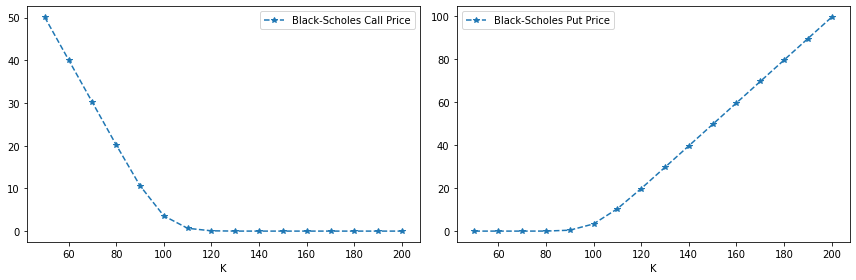

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from enum import Enum


class OptionType(Enum):
    CALL = 'call'
    PUT = 'put'


def compute_option_price_BS(S, K, tau, r, sigma, cp):
    d1, d2 = compute_d1_d2(S, K, tau, r, sigma) 
    if cp == OptionType.CALL:
        value = S * st.norm.cdf( d1 ) - K*np.exp(-r*tau) * st.norm.cdf( d2 )
    if cp == OptionType.PUT:
        value = - S * st.norm.cdf( - d1 ) + K*np.exp(-r*tau) * st.norm.cdf( - d2 )
    return value


def compute_d1_d2(S, K, tau, r, sigma):
    d1 = ( np.log(S/K) + ( r + sigma**2 / 2 ) * tau ) / ( sigma * np.sqrt(tau) )
    d2 = d1 - sigma * np.sqrt(tau)
    return d1, d2


def main():
    S = 100
    K = np.arange(50, 210, 10)
    tau = 1/12
    r = 0.03
    sigma = 0.3
    
    call_value = compute_option_price_BS(S, K, tau, r, sigma, cp=OptionType.CALL) 
    put_value = compute_option_price_BS(S, K, tau, r, sigma, cp=OptionType.PUT)
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
    
    ax0.plot(K,call_value,'--*',label='Black-Scholes Call Price')
    ax1.plot(K,put_value,'--*',label='Black-Scholes Put Price')
    for ax in (ax0, ax1):
        ax.set_xlabel('K')
        ax.legend()
        
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()    

######***BS Formula using PDE***

***Black–Scholes PDE***

$$
\begin{array}{llc}
\text{Black–Scholes PDE}
&&
{\displaystyle
    {\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0
}\\
\text{Call Terminal Condition}&&
\max(S-K,0)
\end{array}
$$

***Change of Variables***
$$
\begin{array}{lll}
\tau&=&T-t\\
x&=&\log S + \left(r-\frac{1}{2}\sigma^2\right)(T-t)\\
F&=&Ve^{r\tau}
\end{array}$$

***From BS PDE To Heat Equation***


$$
\displaystyle \frac{\partial V}{\partial t}
=
\frac{\partial V}{\partial x}\frac{\partial x}{\partial t}+\frac{\partial V}{\partial \tau}\frac{\partial \tau}{\partial t}
=
-\frac{\partial V}{\partial x}\left(r-\frac{1}{2}\sigma^2\right)-\frac{\partial V}{\partial \tau}
$$

$$
\displaystyle \frac{\partial V}{\partial S}
=
\frac{\partial V}{\partial x}\frac{\partial x}{\partial S}+\frac{\partial V}{\partial \tau}\frac{\partial \tau}{\partial S}
=
\frac{\partial V}{\partial x}\frac{1}{S}
$$

$$
\begin{array}{lll}
\displaystyle \frac{\partial^2 V}{\partial S^2}
&=&
\displaystyle \frac{\partial}{\partial S}\left(\frac{\partial V}{\partial x}\frac{1}{S}\right)\\
&=&
\displaystyle \frac{\partial}{\partial x}\left(\frac{\partial V}{\partial x}\frac{1}{S}\right)\frac{\partial x}{\partial S}
+
\frac{\partial}{\partial \tau}\left(\frac{\partial V}{\partial x}\frac{1}{S}\right)\frac{\partial \tau}{\partial S}\\
&=&
\displaystyle \frac{\partial}{\partial x}\left(\frac{\partial V}{\partial x}\frac{1}{S}\right)\frac{1}{S}\\
&=&
\displaystyle \frac{\partial^2 V}{\partial x^2}\frac{1}{S^2}
+
\frac{\partial V}{\partial x}\frac{\partial}{\partial x}\left(\frac{1}{S}\right)\frac{1}{S}\quad\left(\because\frac{1}{S}=e^{-x+(r-\frac{1}{2}\sigma^2)\tau}\right)
\\
&=&
\displaystyle \frac{\partial^2 V}{\partial x^2}\frac{1}{S^2}
-
\frac{\partial V}{\partial x}\frac{1}{S^2}
\\
\end{array}
$$

$$\begin{array}{lll}
&&
\displaystyle
    {\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0\\
&\Rightarrow&
\displaystyle
-\frac{\partial V}{\partial x}\left(r-\frac{1}{2}\sigma^2\right)-\frac{\partial V}{\partial \tau}+\frac{1}{2}\sigma ^{2}\left(\frac{\partial ^{2}V}{\partial x^{2}}-\frac{\partial V}{\partial x}\right)+r\frac{\partial V}{\partial x}-rV=0\\
&\Rightarrow&
\displaystyle
-\frac{\partial V}{\partial \tau}+\frac{1}{2}\sigma ^{2}\frac{\partial ^{2}V}{\partial x^{2}}-rV=0\\
\end{array}
$$

Since $V=Fe^{-r\tau}$,
$$\begin{array}{lll}
&&
\displaystyle
-\frac{\partial V}{\partial \tau}+\frac{1}{2}\sigma ^{2}\frac{\partial ^{2}V}{\partial x^{2}}-rV=0\\
&\Rightarrow&
\displaystyle
-F_\tau e^{-r\tau}+rF e^{-r\tau}+\frac{1}{2}\sigma ^{2}F_{xx}e^{-r\tau}-rF e^{-r\tau}=0\\
&\Rightarrow&
\displaystyle
-F_\tau e^{-r\tau}+\frac{1}{2}\sigma ^{2}F_{xx}e^{-r\tau}=0\\
&\Rightarrow&
\displaystyle
F_\tau =\frac{1}{2}\sigma ^{2}F_{xx}\\
\end{array}
$$

***Heat Equation***
$$
\begin{array}{llc}
\text{Heat Equation}
&&
{\displaystyle
    {\frac {\partial F}{\partial \tau}}={\frac {1}{2}}\sigma ^{2}{\frac {\partial ^{2}F}{\partial x^{2}}}
}
\\
\text{Call Initial Condition}&&
\max(e^x-K,0)
\end{array}
$$

***Fundamental Soution and Superposition***
$$
\begin{array}{llc}
\text{Heat Equation}
&&
{\displaystyle
    {\frac {\partial F}{\partial \tau}}=\frac{1}{2}\sigma^2{\frac {\partial ^{2}F}{\partial x^{2}}}
}\\
\\
\text{Initial Condition}&&
\displaystyle
 F(x,0)=\psi(x)\\
\\
\text{Fundamental Soution}&&
\displaystyle
 \frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}\\
\\
\text{Superposition}&&
\displaystyle
 F(x,\tau)=\int_{-\infty}^\infty \psi(z)
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz\\
\end{array}
$$

***Black Scholes Formula for Call***
$$
\begin{array}{lll}
\displaystyle 
F(x,\tau)&=&
\displaystyle
\int_{-\infty}^\infty \left(e^z-K\right)^+
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz\\
&=&
\displaystyle
\int_{\log K}^\infty \left(e^z-K\right)
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz\\
&=&
\displaystyle
\int_{\log K}^\infty e^z
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz
-K
\int_{\log K}^\infty 
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz\\
\end{array}
$$

$$\begin{array}{lll}
\displaystyle
\int_{\log K}^\infty 
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz
&=&
\displaystyle
\mathbb{P}\left(z\ge\log K\right)\\
&=&
\displaystyle
\mathbb{P}\left(\frac{z-x}{\sigma\sqrt{\tau}}\ge\frac{\log K-x}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
\mathbb{P}\left(Z\ge\frac{\log K-x}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
\mathbb{P}\left(Z\le\frac{x-\log K}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
N\left(Z\le\frac{x-\log K}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
N\left(d_2\right)\\
\end{array}
$$

$$\begin{array}{lll}
\displaystyle
\int_{\log K}^\infty 
e^z\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{(x-z)^2}{2\sigma^2 \tau}}dz
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
\int_{\log K}^\infty 
\frac{1}{\sqrt{2\pi \sigma^2 \tau}}e^{-\frac{\left(z-\left(x+\sigma^2\tau\right)\right)^2}{2\sigma^2 \tau}}dz\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
\mathbb{P}\left(z\ge\log K\right)\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
\mathbb{P}\left(\frac{z-\left(x+\sigma^2\tau\right)}{\sigma\sqrt{\tau}}\ge\frac{\log K-\left(x+\sigma^2\tau\right)}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
\mathbb{P}\left(Z\ge\frac{\log K-\left(x+\sigma^2\tau\right)}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
\mathbb{P}\left(Z\le\frac{\left(x+\sigma^2\tau\right)-\log K}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
N\left(Z\le\frac{\left(x+\sigma^2\tau\right)-\log K}{\sigma\sqrt{\tau}}\right)\\
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
N\left(d_1\right)\\
\end{array}
$$

$$
\begin{array}{lll}
\displaystyle 
F(x,\tau)
&=&
\displaystyle
e^{x+\frac{\sigma^2\tau}{2}}
N\left(d_1\right)
-K
N\left(d_2\right)\\
&=&
\displaystyle
Se^{r\tau}
N\left(d_1\right)
-K
N\left(d_2\right)\\
\\
V(S,t)
&=&
\displaystyle
S
N\left(d_1\right)
-Ke^{-r(T-t)}
N\left(d_2\right)\\
\end{array}
$$

######***BS Formula using Kolmogorov Backward Equation***

***SDE for Black Scholes***

$$
\displaystyle
dS_t=r S_tdt+\sigma S_tdW_t
$$

***Kolmogorov Backward Equation for Black Scholes***

$$
\displaystyle
\frac{\partial p(S_T,T|S_0,t_0)}{\partial t_0}
+r S_0\frac{\partial p(S_T,T|S_0,t_0)}{\partial S_0} 
+
\frac{1}{2}\sigma^2 S_0^2\frac{\partial^2 p(S_T,T|S_0,t_0)}{\partial S_0^2}
=0
$$

For fixed $S_T$ and $T$, we let $v(S_0,t_0)=p(S_T,T|S_0,t_0)$

$$
\displaystyle
\frac{\partial v}{\partial t_0}
+r S_0\frac{\partial v}{\partial S_0} 
+
\frac{1}{2}\sigma^2 S_0^2\frac{\partial^2 v}{\partial S_0^2}
=0
$$

With new notations $t=t_0$ and $S=S_0$

$$
\displaystyle
\frac{\partial v}{\partial t}
+r S\frac{\partial v}{\partial S} 
+
\frac{1}{2}\sigma^2 S^2\frac{\partial^2 v}{\partial S^2}
=0
$$

***Superposition***

Let $f(S_T)$ be a payoff function. Then, $v(S,t)=\int_0^\infty f(S_T)p(S_T,T|S,t)dS_T$
satisfies

$$
\displaystyle
\frac{\partial v}{\partial t}
+r S\frac{\partial v}{\partial S} 
+
\frac{1}{2}\sigma^2 S^2\frac{\partial^2 v}{\partial S^2}
=0
$$

***Discount Factor***

Let $V(S,t)=e^{-r(T-t)}v(S,t)$. Then, $V(S,t)$ satisfies

$$
\displaystyle
\frac{\partial V}{\partial t}
+r S\frac{\partial V}{\partial S} 
+
\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
-rV
=0
$$

***Black Scholes Formula***

$$
\displaystyle
V(S,t)=e^{-r(T-t)}\int_0^\infty f(S_T)p(S_T,T|S,t)dS_T
$$

satisfies the Black Scholes PDE

$$
\displaystyle
\frac{\partial V}{\partial t}
+r S\frac{\partial V}{\partial S} 
+
\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
-rV
=0
$$

It also satisfies the terminal condition

$$
\displaystyle
V(S_T,T)=\int_0^\infty f(S_T)p(S_T,T|S=S_T,t=T)dS_T=f(S_T)
$$

######***BS Formula using Feynman-Kac Formula***

***Feynman-Kac Formula***

Consider the partial differential equation
$$
{\frac {\partial u}{\partial t}}(x,t)+\mu (x,t){\frac {\partial u}{\partial x}}(x,t)+{\tfrac {1}{2}}\sigma ^{2}(x,t){\frac {\partial ^{2}u}{\partial x^{2}}}(x,t)-V(x,t)u(x,t)+f(x,t)=0
$$
defined for all 
$x \in \mathbb{R}$ and 
$t \in [0, T]$, subject to the terminal condition
$$
u(x,T)=\psi (x)
$$
where $\mu$, $\sigma$, $\psi$, $V$, $f$ are known functions, $T$ is a parameter and 
$u:\mathbb {R} \times [0,T]\to \mathbb {R}$  is the unknown. Then the Feynman–Kac formula tells us that the solution can be written as a conditional expectation
$$
{\displaystyle u(x,t)=E^{Q}\left[\int _{t}^{T}e^{-\int _{t}^{r}V(X_{\tau },\tau )\,d\tau }f(X_{r},r)dr+e^{-\int _{t}^{T}V(X_{\tau },\tau )\,d\tau }\psi (X_{T})\,{\Bigg |}\,X_{t}=x\right]}
$$
under the probability measure Q such that X is an Itô process driven by the equation
$$
{\displaystyle dX_{t}=\mu (X,t)\,dt+\sigma (X,t)\,dW_{t}^{Q}}
$$
with $W^Q(t)$ is a Wiener process (also called Brownian motion) under $Q$, and the initial condition for $X(t)$ is $X(t) = x$.

***Black Scholes Formula***
$$\begin{array}{lcc}
\text{Black-Scholes Equation}&&\displaystyle
\frac{\partial V}{\partial t}
+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
+r S\frac{\partial V}{\partial S}
-rV
=0\\
\\
\text{Terminal Condition}&&\displaystyle
V(T,S_T)=\Phi(S_T)\\
\\
\text{Stochastic Process}&&\displaystyle
dS=rSdt+\sigma S dB\\
\\
\text{Feynman-Kac Formula}&&\displaystyle
V(t,S)=e^{-r(T-t)}\mathbb{E}_{(t,S)}\Phi(S_T)
\end{array}$$

***Black Scholes Formula with Heat Source***

$$\begin{array}{lcc}
\text{Black-Scholes Equation}&&\displaystyle
\displaystyle
\frac{\partial V}{\partial t}
+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
+r S\frac{\partial V}{\partial S}
-rV+f
=0\\
\\
\text{Terminal Condition}&&\displaystyle
V(T,s_T)=\Phi(s_T)\\
\\
\text{Stochastic Process}&&\displaystyle
dS=rSdt+\sigma S dB\\
\\
\text{Feynman-Kac Formula}&&\displaystyle
V(t,S) = e^{-r(T-t)}E_{(t,S)}\left[\Phi(S_T)\right]+E_{(t,S)}\left[\int_t^Te^{-r(\tau-t)}f(\tau,S_\tau)d\tau\right]
\end{array}$$

######***BS Formula using Change of Numeraire***

***Black Scholes Formula***
$$\begin{array}{lcc}
\text{Black-Scholes Equation}&&\displaystyle
\frac{\partial V}{\partial t}
+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
+r S\frac{\partial V}{\partial S}
-rV
=0\\
\\
\text{Terminal Condition}&&\displaystyle
V(T,S_T)=\Phi(S_T)\\
\\
\text{Stochastic Process}&&\displaystyle
dS=rSdt+\sigma S dB\\
\\
\text{Feynman-Kac Formula}&&\displaystyle
V(t,S)=e^{-r(T-t)}\mathbb{E}_{(t,S)}\Phi(S_T)
\end{array}$$

***Proof***

Since $V$ satisfies $\frac{\partial V}{\partial t}
+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
+r S\frac{\partial V}{\partial S}
-rV
=0$,

$$\begin{array}{lll}
dV &=&\displaystyle
V_tdt+V_SdS+\frac{1}{2}V_{SS}(dS)^2\\
&=&\displaystyle
V_tdt+V_S\left(rSdt+\sigma SdB^\mathbb{Q}\right)+\frac{1}{2}V_{SS}\left(rSdt+\sigma SdB^\mathbb{Q}\right)^2\\
&=&\displaystyle
V_tdt+V_S\left(rSdt+\sigma SdB^\mathbb{Q}\right)+\frac{1}{2}V_{SS}\left(\sigma^2 S^2dt\right)\\
&=&\displaystyle
\left(\color{red}{V_t+rSV_S+\frac{1}{2}\sigma^2S^2V_{SS}}\right)dt+\left(\sigma SV_S\right)dB^\mathbb{Q}\\
&=&\displaystyle
\color{red}{rV}dt+\sigma SV_SdB^\mathbb{Q}\\
\end{array}$$

$$\begin{array}{lll}
\displaystyle
d\left(\frac{V}{e^{rt}}\right) &=&\displaystyle
\frac{dV}{e^{rt}}-r\frac{V}{e^{rt}}dt\\
&=&\displaystyle
\frac{rVdt+\sigma SV_SdB^\mathbb{Q}}{e^{rt}}-r\frac{V}{e^{rt}}dt\\
&=&\displaystyle
\sigma S\left(\frac{V_S}{e^{rt}}\right)dB^\mathbb{Q}
\end{array}$$

Therefore,
$
\displaystyle
v(t,S_t) = \frac{V(t,S_t)}{e^{rt}}
$ is a $\mathbb{Q}$-martingale.

Since $\frac{V}{e^{rt}}$ is a martingale,

$$\begin{array}{lll}
\displaystyle
\frac{V(t,S_t)}{e^{rt}}=
\mathbb{E}\left[\frac{V(T,S_T)}{e^{rT}}\Big{|}{\cal F}_t\right]
=
\mathbb{E}\left[\frac{\Phi(S_T)}{e^{rT}}\Big{|}{\cal F}_t\right]
\quad\Rightarrow\quad
V(t,S_t)=e^{-r(T-t)}\mathbb{E}\left[\Phi(S_T)\Big{|}{\cal F}_t\right]
\end{array}$$

Since $\frac{V}{e^{rt}}$ satisfies the Markov property,

$$\begin{array}{lll}
\displaystyle
V(t,S_t)=e^{-r(T-t)}\mathbb{E}\left[\Phi(S_T)\Big{|}{\cal F}_t\right]
=e^{-r(T-t)}\mathbb{E}\left[\Phi(S_T)\Big{|}t, S_t\right]
\end{array}$$

***Black Scholes Formula with Heat Source***

$$\begin{array}{lcc}
\text{Black-Scholes Equation}&&\displaystyle
\displaystyle
\frac{\partial V}{\partial t}
+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}
+r S\frac{\partial V}{\partial S}
-rV+f
=0\\
\\
\text{Terminal Condition}&&\displaystyle
V(T,s_T)=\Phi(s_T)\\
\\
\text{Stochastic Process}&&\displaystyle
dS=rSdt+\sigma S dB\\
\\
\text{Feynman-Kac Formula}&&\displaystyle
V(t,S) = e^{-r(T-t)}E_{(t,S)}\left[\Phi(S_T)\right]+E_{(t,S)}\left[\int_t^Te^{-r(\tau-t)}f(\tau,S_\tau)d\tau\right]
\end{array}$$

***Proof***

$$\begin{array}{lll}
\displaystyle
d\left(\frac{V}{e^{rt}}\right) &=&\displaystyle
\frac{dV}{e^{rt}}-r\frac{V}{e^{rt}}dt\\
&=&\displaystyle
\frac{(rV\color{red}{-f})dt+\sigma SV_SdB}{e^{rt}}-r\frac{V}{e^{rt}}dt\\
&=&\displaystyle
\frac{\color{red}{-f}}{e^{rt}}dt +
\sigma S\left(\frac{V_S}{e^{rt}}\right)dB
\end{array}$$

$$\begin{array}{lll}
dv &=&\displaystyle
d\left(\frac{V}{e^{rt}}\right) + d \int_0^t e^{-r\tau}f(\tau,S_\tau)d\tau\\
&=&\displaystyle
\frac{\color{red}{-f}}{e^{rt}}dt +\sigma S\left(\frac{V_S}{e^{rt}}\right)dB
+e^{-rt}f(t,S_t)dt\\
&=&\displaystyle
\sigma S\left(\frac{V_S}{e^{rt}}\right)dB
\end{array}$$

So, $
\displaystyle
v(t,S_t) = \frac{V(t,S_t)}{e^{rt}}+\int_0^t e^{-r\tau}f(\tau,S_\tau)d\tau
$ is a martingale.

Since $v(t,s)$ is a martingale, 

$$
\begin{array}{lll}
\displaystyle
v(t,S_t) 
&=&\displaystyle
e^{-rt}V(t,S_t)+\int_0^t e^{-r\tau}f(\tau,S_\tau)d\tau\\ 
&=&\displaystyle
\mathbb{E}\left[e^{-rT}V(T,S_T)+\int_0^T e^{-r\tau}f(\tau,S_\tau)d\tau\Big{|}{\cal F}_t\right]\\ 
&=&\displaystyle
\mathbb{E}\left[e^{-rT}V(T,S_T)+\int_0^t e^{-r\tau}f(\tau,S_\tau)d\tau
+\int_t^T e^{-r\tau}f(\tau,S_\tau)d\tau\Big{|}{\cal F}_t\right]\\ 
\end{array}
$$
and
$$
\begin{array}{lll}
\displaystyle
e^{-rt}V(t,S_t)
&=&\displaystyle
\mathbb{E}\left[e^{-rT}V(T,S_T)+\int_t^T e^{-r\tau}f(\tau,S_\tau)d\tau\Big{|}{\cal F}_t\right]\\ 
\end{array}
$$
and hence
$$
\begin{array}{lll}
\displaystyle
V(t,S_t)
&=&\displaystyle
\mathbb{E}\left[e^{-r(T-t)}V(T,S_T)+\int_t^T e^{-r(\tau-t)}f(\tau,S_\tau)d\tau\Big{|}{\cal F}_t\right]\\ 
\end{array}
$$

Since $e^{-r(T-t)}V(T,S_T)+\int_t^T e^{-r(\tau-t)}f(\tau,S_\tau)d\tau$ satisfies the Markov property,

$$
\begin{array}{lll}
\displaystyle
V(t,S_t)
&=&\displaystyle
\mathbb{E}\left[e^{-r(T-t)}V(T,S_T)+\int_t^T e^{-r(\tau-t)}f(\tau,S_\tau)d\tau\Big{|}{\cal F}_t\right]\\ 
&=&\displaystyle
\mathbb{E}\left[e^{-r(T-t)}V(T,S_T)+\int_t^T e^{-r(\tau-t)}f(\tau,S_\tau)d\tau\Big{|}t, S_t\right]\\ 
\end{array}
$$

###***Chapter 10 Estimating Volatilities and Correlations***

###***Chapter 10 Bond***

###### Bonds price quote

$$\begin{array}{lll}
\text{corporate bonds}&\text{1/8 increments}\\
\text{government bills, notes, and bonds}&\text{1/32 increments}\\
\end{array}$$

You can see bonds prices quoted in 1/32th increments [here](https://www.bloomberg.com/markets/rates-bonds/government-bonds/us). As of 2011-10-23 you can see the 5 year note with a 1% coupon quoted with a price of "99-21¾" = 99 + 21.75/32 resulting in a yield of 1.07%.
[How can I understand "thirty-seconds of a dollar"?](https://english.stackexchange.com/questions/45977/how-can-i-understand-thirty-seconds-of-a-dollar)

In [ ]:
import numpy as np

coupon = 0.01
face_value = 100

price = 99 + (21+3/4) / 32
print(price)

#                       price           continuous compounding discrete compounding 
# yield_rate = 0.0106 # 99.6796875      99.69491779393837      99.70856275264174
yield_rate = 0.0107   # 99.6796875      99.64618584276408      99.6600821321915
# yield_rate = 0.0108 # 99.6796875      99.59747805070536      99.61162782828589

value_discrete_compounding = 0
value_continuous_compounding = 0
for i in range(1,11):
    period = 0.5 * i    
    value_discrete_compounding += face_value*(coupon/2)/(1+yield_rate/2)**i
    value_continuous_compounding += face_value*(coupon/2)*np.exp(-yield_rate*period)
value_discrete_compounding += face_value/(1+yield_rate/2)**i
value_continuous_compounding += face_value*np.exp(-yield_rate*period)
print(value_discrete_compounding)
print(value_continuous_compounding)

99.6796875
99.6600821321915
99.64618584276408


###***Chapter 10 Stock***

###### [“신보다 돈 많이 번 회사”… 40여년전부터 기후위기 예측하고도 ‘쉬쉬’](https://www.chosun.com/economy/science/2023/01/14/YGWJ7FGD45EENJ7VWVPHUIQHZA/)

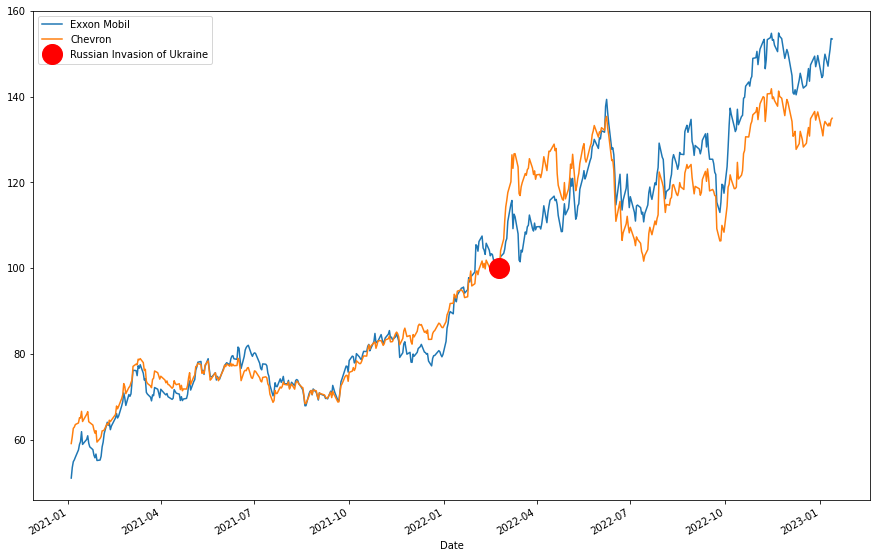

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2022-02-24" # russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

# https://finance.yahoo.com/u/yahoo-finance/watchlists/oil-and-gas-stocks
tickers = {
    "XOM": "Exxon Mobil",      # 465.98B
    "CVX": "Chevron",          # 343.34B
    # "SHEL": "Shell",         # 208.25B
    # "TTE": "TotalEnergies",  # 160.04B
    # "COP": "ConocoPhillips", # 151.36B
    # "BP": "BP",              # 107.46B
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[100],'or',label="Russian Invasion of Ukraine",ms=20)
ax.legend()
plt.show()

###### [‘승객 대신 화물 수송’ 역발상으로 위기 극복](http://economychosun.com/client/news/view.php?boardName=C00&t_num=13611151)

<img src="https://images.chosun.com/resizer/iXEc6JboFTbLkXpfga76hXdc2ds=/500x449/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/ZOZYRE5KIFHZTB5HMPFAUNVHSM.png">

<img src="https://images.chosun.com/resizer/p8CyMevd82LciBWqVngJJMLDx1A=/430x361/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/46F5HMHBY5DD5EW6KCPRT3I6YA.png">

Sorce [항공사들 울며 겨자먹기… 비행기 좌석 뜯어고치는 이유](https://www.chosun.com/economy/industry-company/2023/01/17/VWWD53FJPZEFBB6QS7I5G6WLWA/)

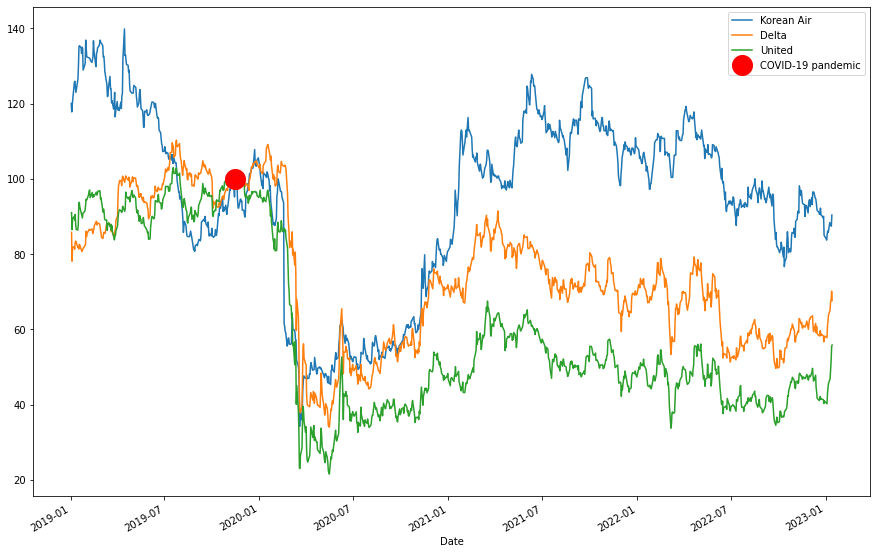

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2019-01-01'
end = '2023-12-31'
event = "2019-11-15" # COVID-19 pandemic (2019-11-17) before (Friday)
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

tickers = {
    "003490.KS": "Korean Air",
    # "AAL": "American",
    "DAL": "Delta",
    "UAL": "United",
    # "LUV": "Southwest",
}
tickers_dict = {"003490.KS" : "Korean Air"}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[100],'or',label="COVID-19 pandemic",ms=20)
ax.legend()
plt.show()

###### [JP모건·모건스탠리 “증시 상승세, 신기루다...곧 난기류 만난다”](https://www.chosun.com/economy/2023/01/18/CZARADYWOFCKBBIRNCHQQWBHGE/)

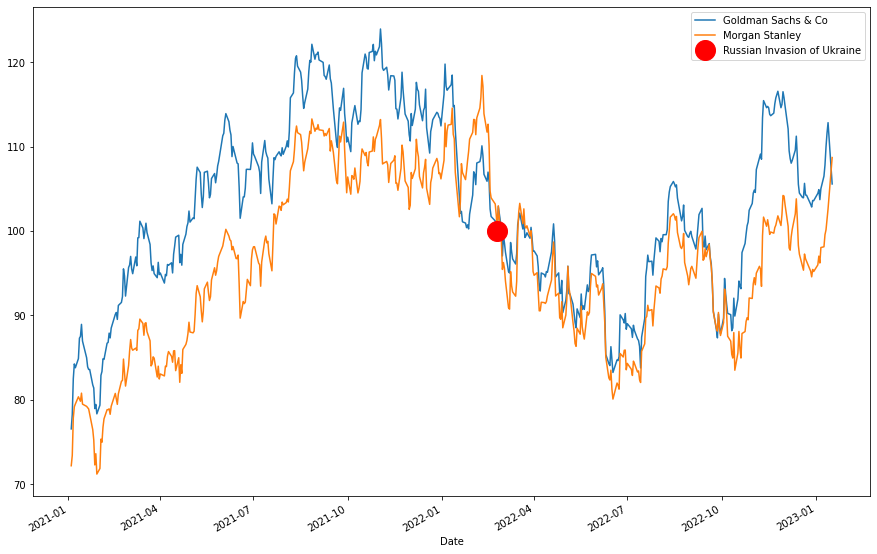

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2022-02-24" # russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

# https://markets.ft.com/data/league-tables/tables-and-trends
tickers = {
    #"JPM": "JP Morgan",      
    "GS": "Goldman Sachs & Co",         
    #"BAC": "Bank of America Corp",       
    "MS": "Morgan Stanley",  
    # "C": "Citi", 
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[100],'or',label="Russian Invasion of Ukraine",ms=20)
ax.legend()
plt.show()


###### ['천궁 4조 수출' 타고…LIG넥스원 올 최대폭 16%↑](https://www.sedaily.com/NewsView/22U1WH80NP) [UAE 근황( feat 300억 불의 비밀)](https://blog.naver.com/ranto28/222985830967)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text

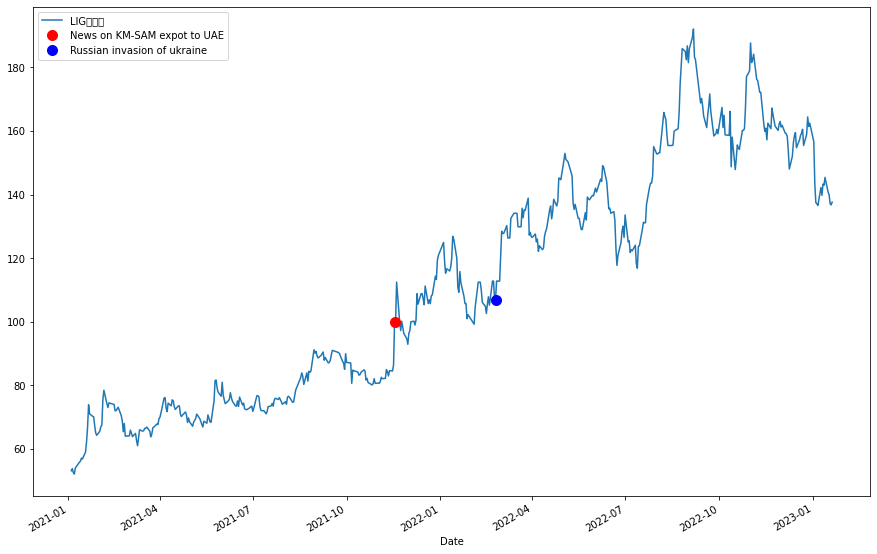

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2021-11-17" # News on KM-SAM expot to UAE
event2 = "2022-02-24" # Russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')
event2_dt = dt.datetime.strptime(event2,'%Y-%m-%d')

# https://www.sedaily.com/NewsView/22U1WH80NP
# https://blog.naver.com/ranto28/222985830967
tickers = {    
    "079550.KS": "LIG넥스원",         
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[100],'or',label="News on KM-SAM expot to UAE",ms=10)
ax.plot([event2_dt],[df.Close[event2]],'ob',label="Russian invasion of ukraine",ms=10)
ax.legend()
plt.show()

###### [사설 교도소 근황 (feat 경기침체 관련주)](https://blog.naver.com/ranto28/222995374398)

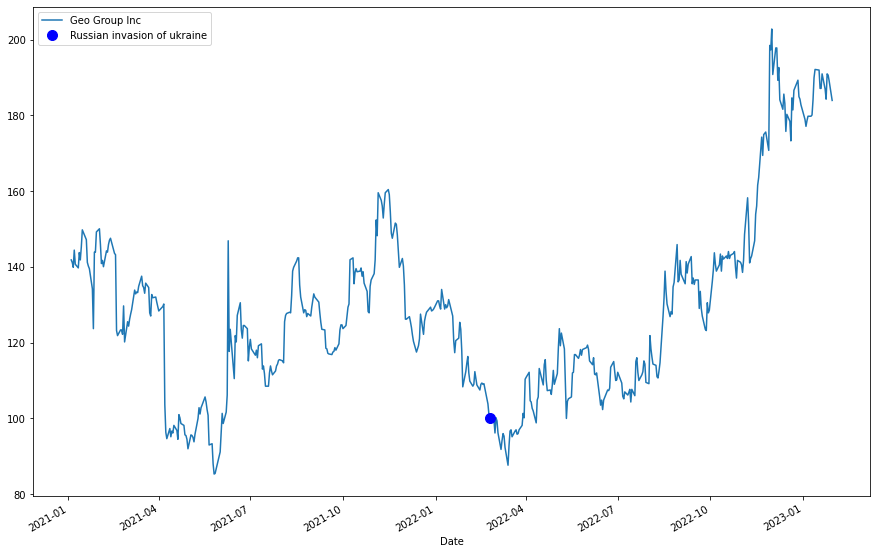

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2022-02-24" # Russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

# https://blog.naver.com/ranto28/222995374398
tickers = {    
    "GEO": "Geo Group Inc",         
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[df.Close[event]],'ob',label="Russian invasion of ukraine",ms=10)
ax.legend()
plt.show()

[중국 게임 근황(feat 황금주)](https://blog.naver.com/ranto28/222997027329)

                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00+08:00  553.877928  578.693247  553.381621  568.270813   
2021-01-05 00:00:00+08:00  567.774528  582.167414  561.322545  579.189575   
2021-01-06 00:00:00+08:00  580.678459  594.575038  580.678459  592.093506   
2021-01-07 00:00:00+08:00  576.211769  580.182221  564.300415  564.300415   
2021-01-08 00:00:00+08:00  564.300393  573.730215  563.307780  568.767151   
...                               ...         ...         ...         ...   
2023-01-18 00:00:00+08:00  380.000000  381.000000  371.000000  380.000000   
2023-01-19 00:00:00+08:00  377.000000  385.000000  374.600006  382.799988   
2023-01-20 00:00:00+08:00  390.000000  392.200012  385.000000  391.799988   
2023-01-26 00:00:00+08:00  400.000000  406.799988  398.399994  406.799988   
2023-01-27 00:00:00+08:00  410.200012  416.600006  409.000000  415.000000   

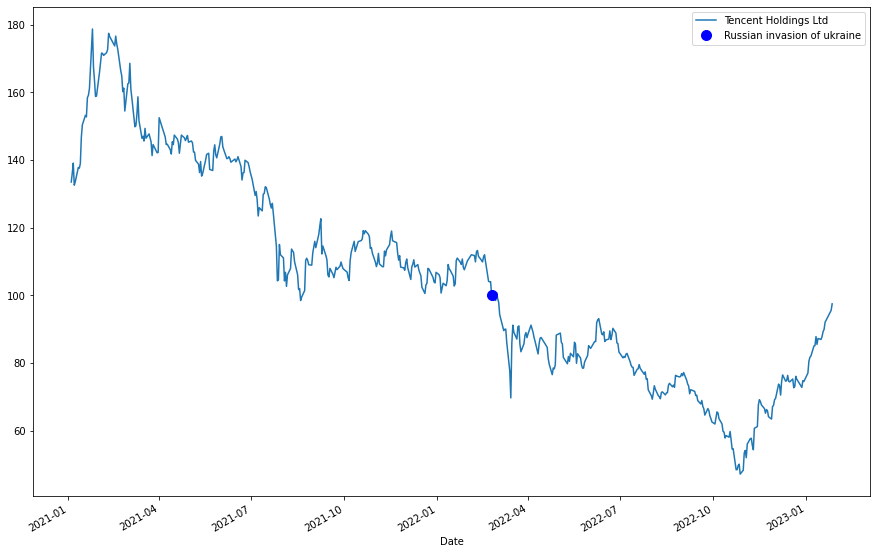

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2022-02-24" # Russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

# https://blog.naver.com/ranto28/222997027329
tickers = {    
    "0700.HK": "Tencent Holdings Ltd",         
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[df.Close[event]],'ob',label="Russian invasion of ukraine",ms=10)
ax.legend()
plt.show()

[[홍익희의 흥미진진 경제사] [11] ‘바다의 마부’라 불린 이 배, 네덜란드 운명 바꿨다](https://www.chosun.com/opinion/2023/01/29/YQ4YN44VKZHGNMK6LJD6A7RWHU/)

<img src="https://www.tradlinx.com/blog/wp-content/uploads/2021/09/210917_%ED%91%9C.jpg">

Sorce [세계 해운시장을 지배하는 글로벌 선사 순위](https://www.tradlinx.com/blog/guide/%EC%84%B8%EA%B3%84-%ED%95%B4%EC%9A%B4%EC%8B%9C%EC%9E%A5%EC%9D%84-%EC%A7%80%EB%B0%B0%ED%95%98%EB%8A%94-%EA%B8%80%EB%A1%9C%EB%B2%8C-%EC%84%A0%EC%82%AC-%EC%88%9C%EC%9C%84/)

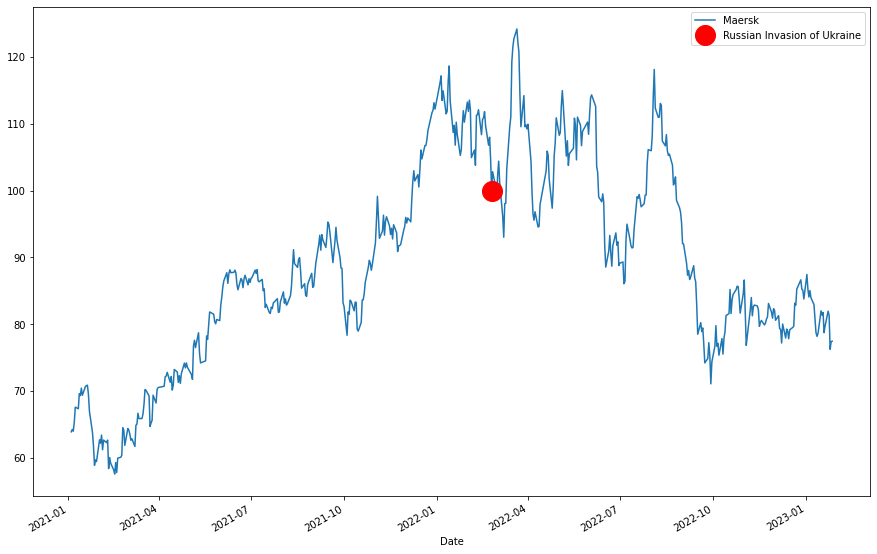

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

start = '2021-01-01'
end = '2023-12-31'
event = "2022-02-24" # russian invasion of ukraine
event_dt = dt.datetime.strptime(event,'%Y-%m-%d')

# https://www.tradlinx.com/blog/guide/%EC%84%B8%EA%B3%84-%ED%95%B4%EC%9A%B4%EC%8B%9C%EC%9E%A5%EC%9D%84-%EC%A7%80%EB%B0%B0%ED%95%98%EB%8A%94-%EA%B8%80%EB%A1%9C%EB%B2%8C-%EC%84%A0%EC%82%AC-%EC%88%9C%EC%9C%84/
tickers = {
    "MAERSK-B.CO": "Maersk", # AP Moller-Maersk Group TEU Capacity: 4,249,714     
    # Mediterranean Shipping Company S.A. (MSC) Private TEU Capacity: 4,131,684         
    # CMA CGM Private TEU Capacity: 3,027,174  
    #
    #
    #
    #     
    # "​011200.KS": "HMM", # ​현대상선  
}

fig, ax = plt.subplots(figsize=(15,10))
for ticker in tickers:
    df = yf.Ticker(ticker).history(start=start,end=end)
    df.Close = df.Close / df.Close[event] * 100 
    df.Close.plot(ax=ax,label=tickers[ticker])
ax.plot([event_dt],[100],'or',label="Russian Invasion of Ukraine",ms=20)
ax.legend()
plt.show()

######***Videos***

[Why Warren Buffett Said No to Lehman and AIG in 2008](https://www.youtube.com/watch?v=1QeUcfqkUzc)